In [48]:
from google.colab import files
uploaded = files.upload()

Saving nba2k20-full.csv to nba2k20-full (1).csv


In [49]:
%matplotlib inline 
# inline is to display inside notebook

import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt
import datetime

 # for chart to look sharp
%config InlineBackend.figure_format = 'retina'
sns.set()

#Clean Code when it's done

The NBA which stands for National Basketball Association is a professional basketball league in North America. It is founded in 1946 and it is now one of the four major sports league in the US and Canada with 30 teams playing 82 season games where 16 seeded teams will play in the playoffs. 

This notebook is a EDA on nba players based on the famous video game - NBA2k20 so the data is based on the NBA players in the 2019/2020 season. 
The dataset is obtained through Kaggle and through the data visualisation we can take a look on the correlation and info on the NBA basketball players.

In [50]:
df_nba = pd.read_csv('nba2k20-full.csv')

In [51]:
df_nba.sample(5)

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_pick,college
243,Reggie Bullock,74,#25,New York Knicks,G,03/16/91,6-6 / 1.98,200 lbs. / 90.7 kg.,$4000000,USA,2013,1,25,North Carolina
83,Gordon Hayward,80,#20,Boston Celtics,F,03/23/90,6-7 / 2.01,207 lbs. / 93.9 kg.,$32700690,USA,2010,1,9,Butler
76,DeAndre Jordan,81,#6,Brooklyn Nets,C,07/21/88,6-11 / 2.11,265 lbs. / 120.2 kg.,$9881598,USA,2008,2,35,Texas A&M
271,Jaxson Hayes,74,#10,New Orleans Pelicans,F-C,05/23/00,6-11 / 2.11,220 lbs. / 99.8 kg.,$4862040,USA,2019,1,8,Texas
287,Shaquille Harrison,73,#3,Chicago Bulls,G,10/06/93,6-7 / 2.01,190 lbs. / 86.2 kg.,$1620564,USA,2016,Undrafted,Undrafted,Tulsa


In [52]:
df_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_name    429 non-null    object
 1   rating       429 non-null    int64 
 2   jersey       429 non-null    object
 3   team         406 non-null    object
 4   position     429 non-null    object
 5   b_day        429 non-null    object
 6   height       429 non-null    object
 7   weight       429 non-null    object
 8   salary       429 non-null    object
 9   country      429 non-null    object
 10  draft_year   429 non-null    int64 
 11  draft_round  429 non-null    object
 12  draft_pick   429 non-null    object
 13  college      363 non-null    object
dtypes: int64(2), object(12)
memory usage: 47.0+ KB


In [53]:
def from_date_to_age(date):
    born=datetime.datetime.strptime(date, '%m/%d/%y')
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
def int_weight(weight):
    return weight.split("/")[1].split(" ")[1]
def int_height(height):
    return height.split("/")[1].split(" ")[1]

df_nba['height']=df_nba['height'].apply(lambda x: int_height(x)).astype('float')
df_nba['weight']=df_nba['weight'].apply(lambda x: int_weight(x)).astype('float')

# convert height and weight to float values and rename 
df_nba.rename({'height':'height_in_m','weight':'weight_in_kg'},axis='columns',inplace=True)

# convert salary to int values
df_nba['salary'] = df_nba['salary'].str[1:].astype('int64')

# convert draft round,pick to int and handle missing value
df_nba['draft_round'] = df_nba['draft_round'].replace({'Undrafted': 0}).astype('int8')

df_nba['jersey'] = df_nba['jersey'].str[1:].astype('int8')

# Indicate if a nba players attended college 
df_nba['college'].isna().astype('int').value_counts() 
df_nba['attended_college'] = ~(df_nba['college'].isna().astype('bool'))

# Indicate their current age
df_nba['current_age']=df_nba['b_day'].apply(lambda x: from_date_to_age(x))

# indicate the numbers of years played since they started nba
df_nba['year_played'] = df_nba['current_age'] - (df_nba['draft_year'] - pd.to_datetime(df_nba['b_day']).dt.year)
df_nba.drop(columns=['b_day'])

,full_name,rating,jersey,team,position,height_in_m,weight_in_kg,salary,country,draft_year,draft_round,draft_pick,college,attended_college,current_age,year_played
0,LeBron James,97,23,Los Angeles Lakers,F,2.06,113.4,37436858,USA,2003,1,1,NaN,False,36,17
1,Kawhi Leonard,97,2,Los Angeles Clippers,F,2.01,102.1,32742000,USA,2011,1,15,San Diego State,True,29,9
2,Giannis Antetokounmpo,96,34,Milwaukee Bucks,F-G,2.11,109.8,25842697,Greece,2013,1,15,NaN,False,26,7
3,Kevin Durant,96,7,Brooklyn Nets,F,2.08,104.3,37199000,USA,2007,1,2,Texas,True,32,13
4,James Harden,96,13,Houston Rockets,G,1.96,99.8,38199000,USA,2009,1,3,Arizona State,True,31,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,Brandon Goodwin,68,0,Atlanta Hawks,G,1.83,81.6,522738,USA,2018,0,Undrafted,Florida Gulf Coast,True,25,2
425,Michael Frazier,68,21,Houston Rockets,G,1.91,90.7,79568,USA,2015,2,60,Florida,True,26,5
426,Kostas Antetokounmpo,68,37,Los Angeles Lakers,F,2.08,90.7,79568,Greece,2018,0,Undrafted,Dayton,True,23,2
427,Jalen Lecque,68,0,Phoenix Suns,G,1.91,86.2,898310,USA,2019,0,Undrafted,NaN,False,20,1


In [54]:
df_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   full_name         429 non-null    object 
 1   rating            429 non-null    int64  
 2   jersey            429 non-null    int8   
 3   team              406 non-null    object 
 4   position          429 non-null    object 
 5   b_day             429 non-null    object 
 6   height_in_m       429 non-null    float64
 7   weight_in_kg      429 non-null    float64
 8   salary            429 non-null    int64  
 9   country           429 non-null    object 
 10  draft_year        429 non-null    int64  
 11  draft_round       429 non-null    int8   
 12  draft_pick        429 non-null    object 
 13  college           363 non-null    object 
 14  attended_college  429 non-null    bool   
 15  current_age       429 non-null    int64  
 16  year_played       429 non-null    int64  
dt

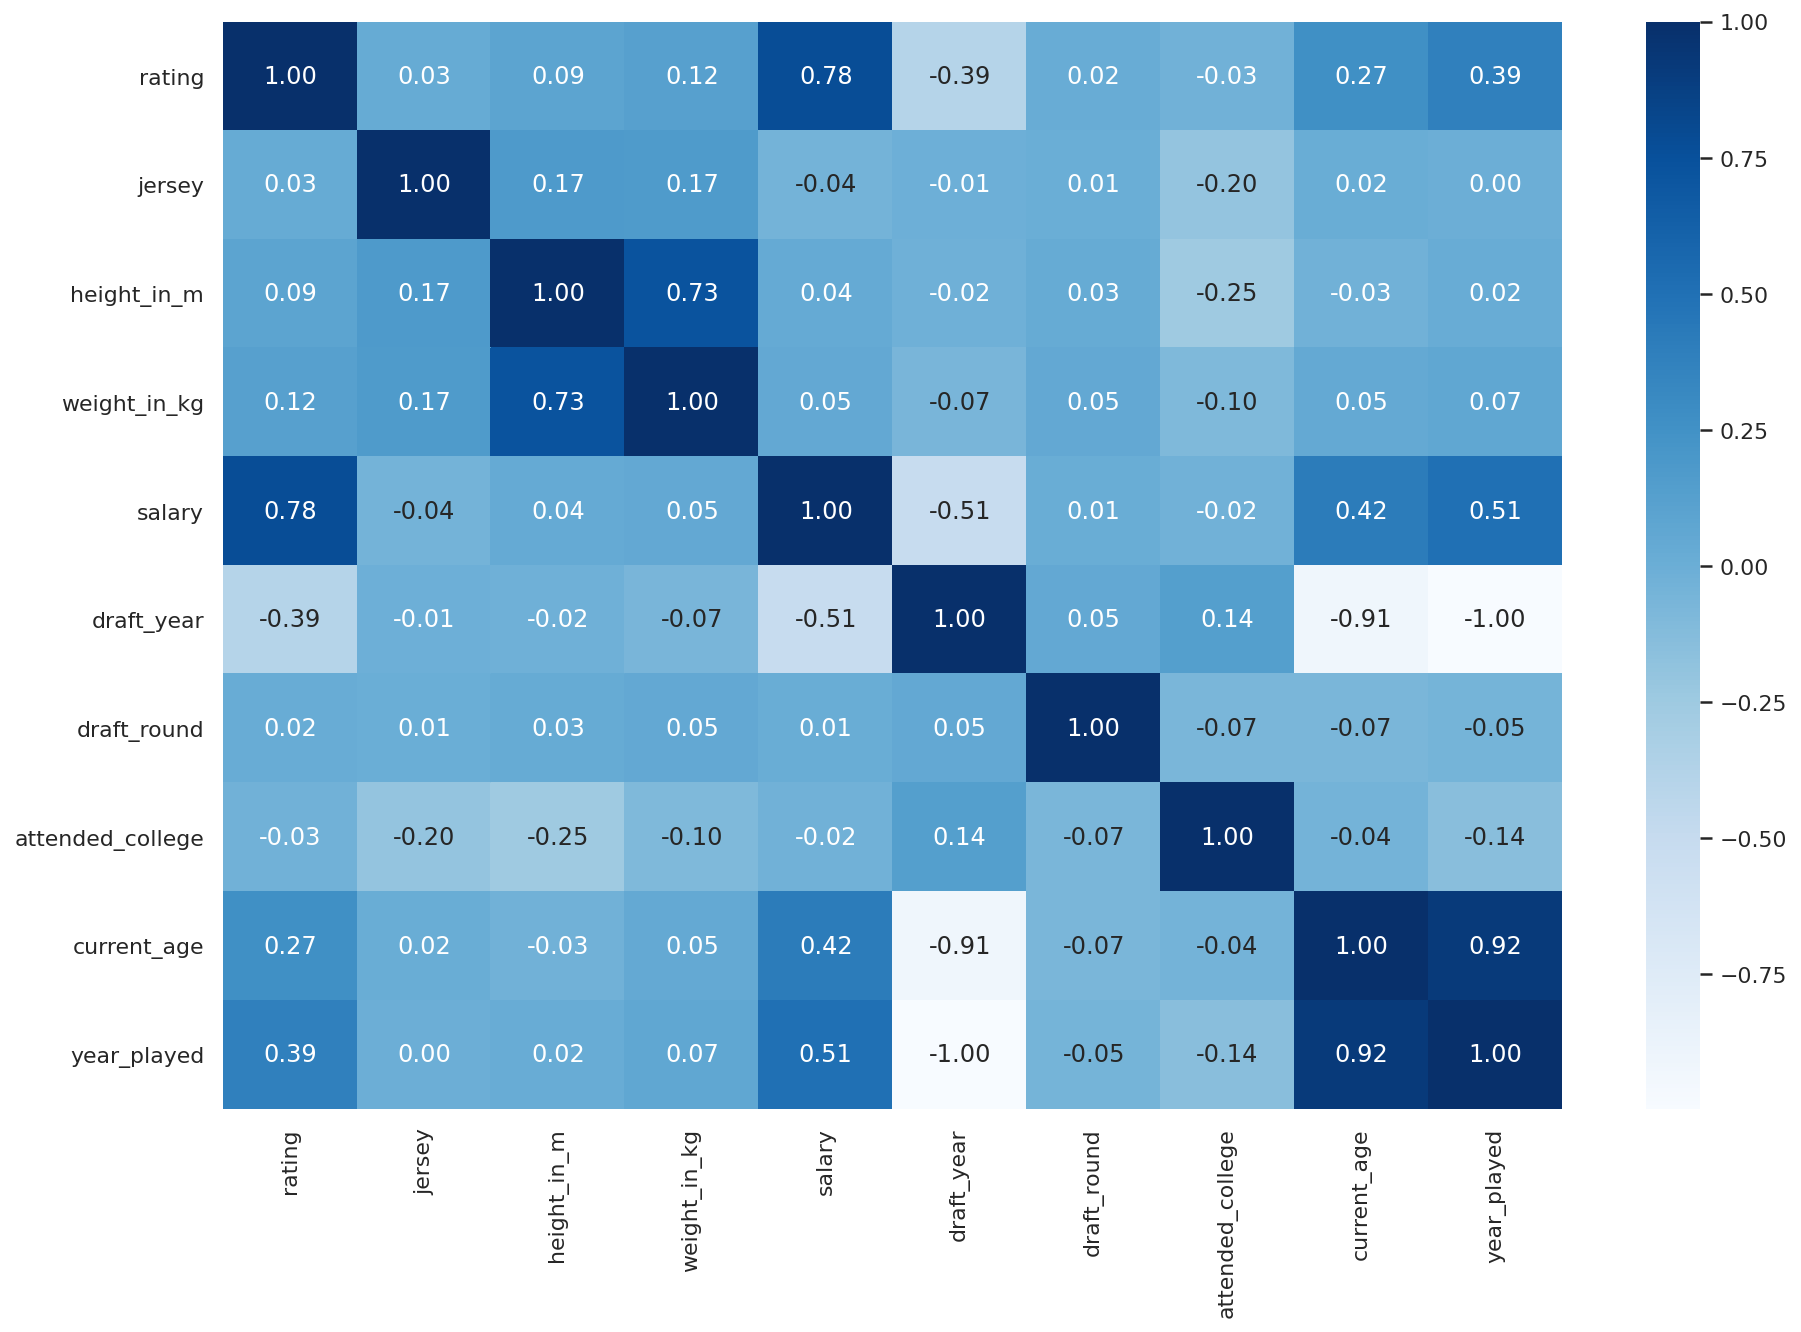

In [55]:
plt.figure(figsize=(15,10))

sns.heatmap(df_nba.corr(),cmap='Blues',annot=True, fmt='.2f')

In this correlation matrix, the information that can be extracted is that:
1. The correlation of rating and salary is high which means the higher the player's rating are, the higher the salary for the player.
2. The second strong correlation which is to no surprise is the height and the weight. Normally the taller the player is the heavier he will weigh.
3. The salary for younger players are usually lesser as they are inexperience and they have yet to prove their worth in the league. Where as the salary will gradually increase as the players played longer in the league.

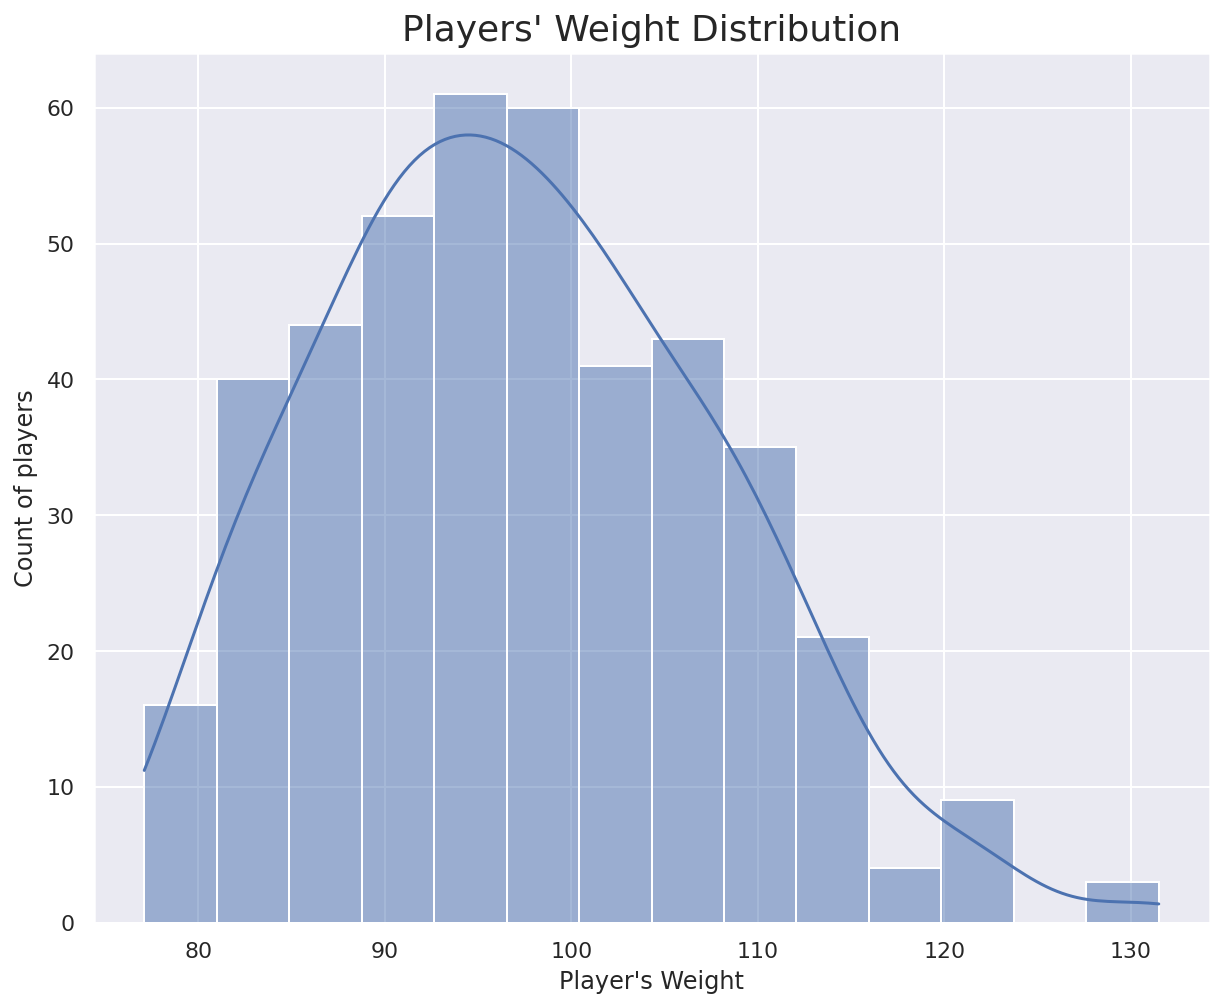

In [56]:
#weight distribution distribution graph
plt.rcParams['figure.figsize'] = (10, 8)
sns.histplot(df_nba['weight_in_kg'], color = 'b', kde = True)
plt.xlabel('Player\'s Weight')
plt.ylabel('Count of players')
plt.title('Players\' Weight Distribution', fontsize=18)
plt.xticks()
plt.show()

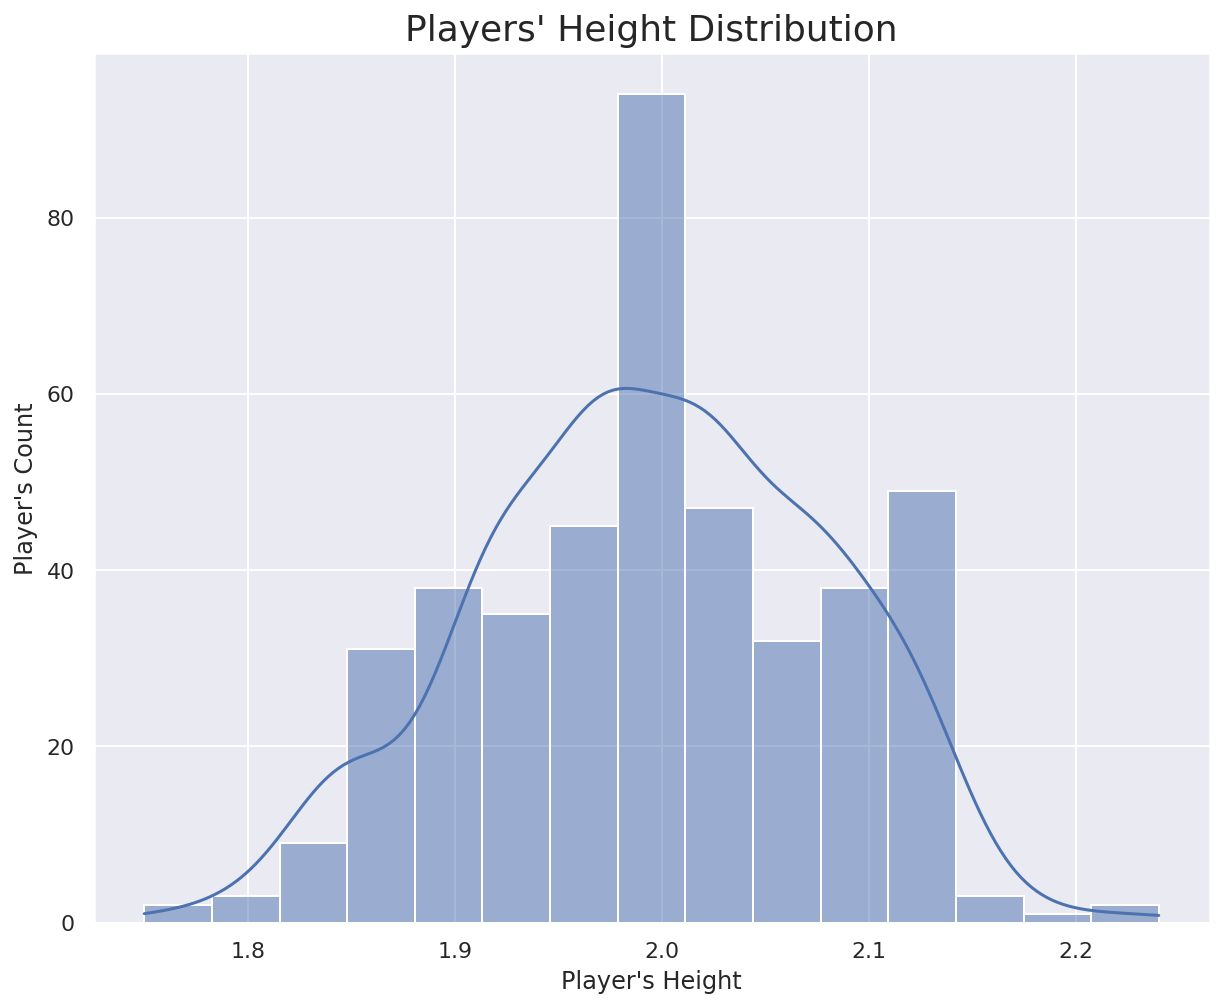

In [57]:
#height distribution distribution graph
plt.rcParams['figure.figsize'] = (10, 8)
sns.histplot(df_nba['height_in_m'], color = 'b', kde = True)
plt.xlabel('Player\'s Height')
plt.ylabel('Player\'s Count')
plt.title('Players\' Height Distribution', fontsize=18)
plt.xticks()
plt.show()

The distribution for the players' height and weight doesn't show aything surprising as the graph shows a normal distribution. Most players weigh about 90 - 100kg and the players height as in the 2 meter range. 

In [58]:
df_nba['jersey'].value_counts()[0:10] #jersey #0 is the highest count 

0     79
3     18
11    16
5     16
9     16
1     16
8     15
2     14
7     14
22    14
Name: jersey, dtype: int64

The most favorite player's jersey number is #0. The number is far more than the second and the third jersey number count which is #3 and #11

In [92]:
#This row for trying out the jersey number #0 problem

jersey_0 = df_nba[(df_nba['team'].notnull()) & (df_nba['jersey'] == 0)]
jersey_0.describe()

,rating,jersey,height_in_m,weight_in_kg,salary,draft_year,draft_round,current_age,year_played
count,57.000000,57.0,57.000000,57.000000,5.700000e+01,57.000000,57.000000,57.000000,57.000000
mean,75.491228,0.0,1.990526,96.910526,8.260123e+06,2014.245614,1.035088,27.052632,5.877193
std,5.375616,0.0,0.078545,9.990079,9.069569e+06,3.656114,0.625783,3.851813,3.586035
min,68.000000,0.0,1.830000,79.400000,3.462880e+05,2004.000000,0.000000,20.000000,1.000000
25%,72.000000,0.0,1.930000,88.500000,1.870564e+06,2012.000000,1.000000,24.000000,3.000000
50%,75.000000,0.0,1.980000,97.500000,2.905800e+06,2015.000000,1.000000,27.000000,5.000000
75%,78.000000,0.0,2.030000,103.000000,1.300000e+07,2018.000000,1.000000,30.000000,8.000000
max,92.000000,0.0,2.130000,122.500000,3.850648e+07,2019.000000,2.000000,35.000000,16.000000


The jersey number #0 count is suppose to be 57 by removing the free agents as they don't have a jersey number. But the jersey number #0 is still by far the players' favourite jersey number. 

In [60]:
print((df_nba['team'].isna()).value_counts()) #maybe got another code to try.
df_nba[df_nba['team'].isna()] #free agents

False    406
True      23
Name: team, dtype: int64


,full_name,rating,jersey,team,position,b_day,height_in_m,weight_in_kg,salary,country,draft_year,draft_round,draft_pick,college,attended_college,current_age,year_played
33,DeMarcus Cousins,86,0,NaN,C,08/13/90,2.08,122.5,3500000,USA,2010,1,5,Kentucky,True,30,10
168,Michael Beasley,76,0,NaN,F,01/09/89,2.08,106.6,3500000,USA,2008,1,2,Kansas State,True,32,13
177,Gerald Green,76,0,NaN,F-G,01/26/86,1.98,87.1,2564753,USA,2005,1,18,NaN,False,35,16
198,Isaiah Thomas,76,0,NaN,G,02/07/89,1.75,83.9,2320044,USA,2011,2,60,Washington,True,32,10
203,Pau Gasol,75,0,NaN,C,07/06/80,2.16,113.4,5538540,Spain,2001,1,3,NaN,False,40,19
237,Allonzo Trier,75,0,NaN,G-F,01/17/96,1.93,90.7,3551100,USA,2018,0,Undrafted,Arizona,True,25,3
264,Chandler Parsons,74,0,NaN,F,10/25/88,2.06,90.7,25102512,USA,2011,2,38,Florida,True,32,9
266,Ivan Rabb,74,0,NaN,F-C,02/04/97,2.08,99.8,451326,USA,2017,2,35,California,True,24,4
283,Allen Crabbe,73,0,NaN,G-F,04/09/92,1.96,89.4,17818456,USA,2013,2,31,California,True,28,7
294,CJ Miles,73,0,NaN,G-F,03/18/87,1.98,105.2,8730158,USA,2005,2,34,NaN,False,33,15


The table above shows the list of players that are free agents in the 2019/2020 season. This means that no teams have found any suitable role to fill these players into the team. As the ratings shows that the players are usually on the lower end of the rating. 

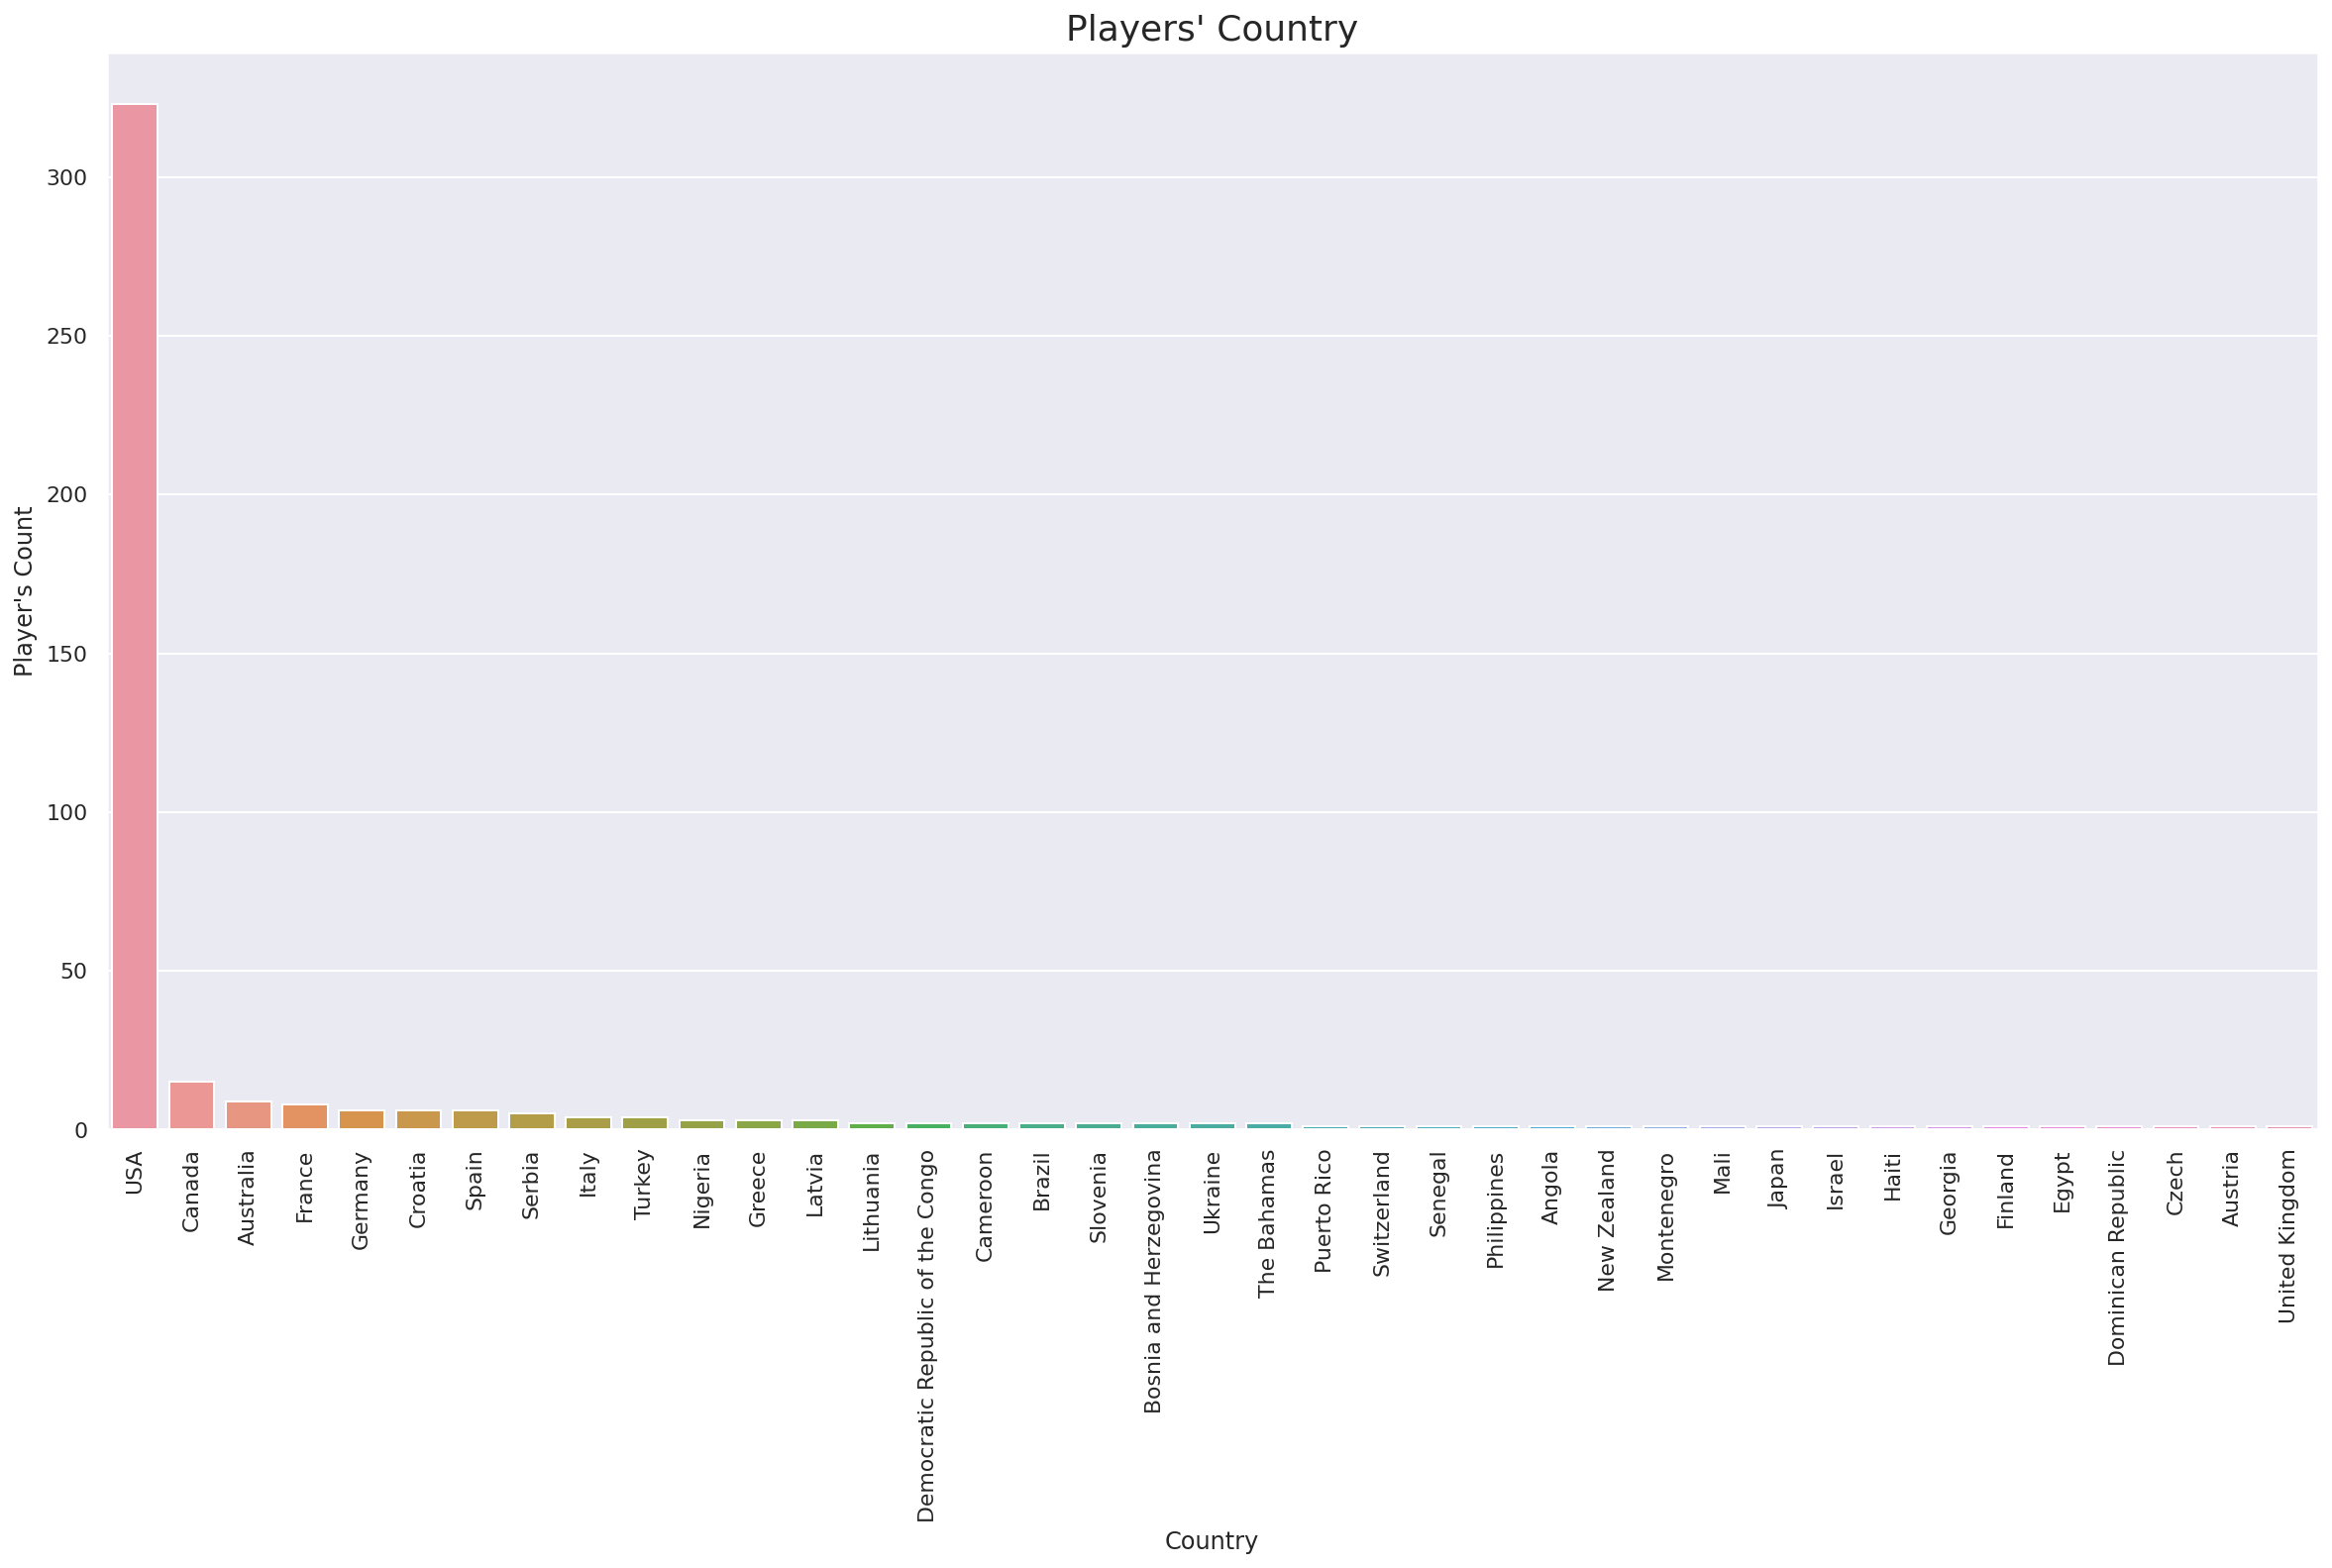

In [61]:
country = df_nba[['country','full_name']].groupby('country').count().sort_values(by='full_name', ascending=False)
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x=country.index, y=country.full_name)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Player\'s Count')
plt.title('Players\' Country', fontsize=18)
plt.show()

Nothing too surprising that most of the players in the NBA is from USA and Canada. The NBA league is very diverse basketball league with players from 39 countries playing.

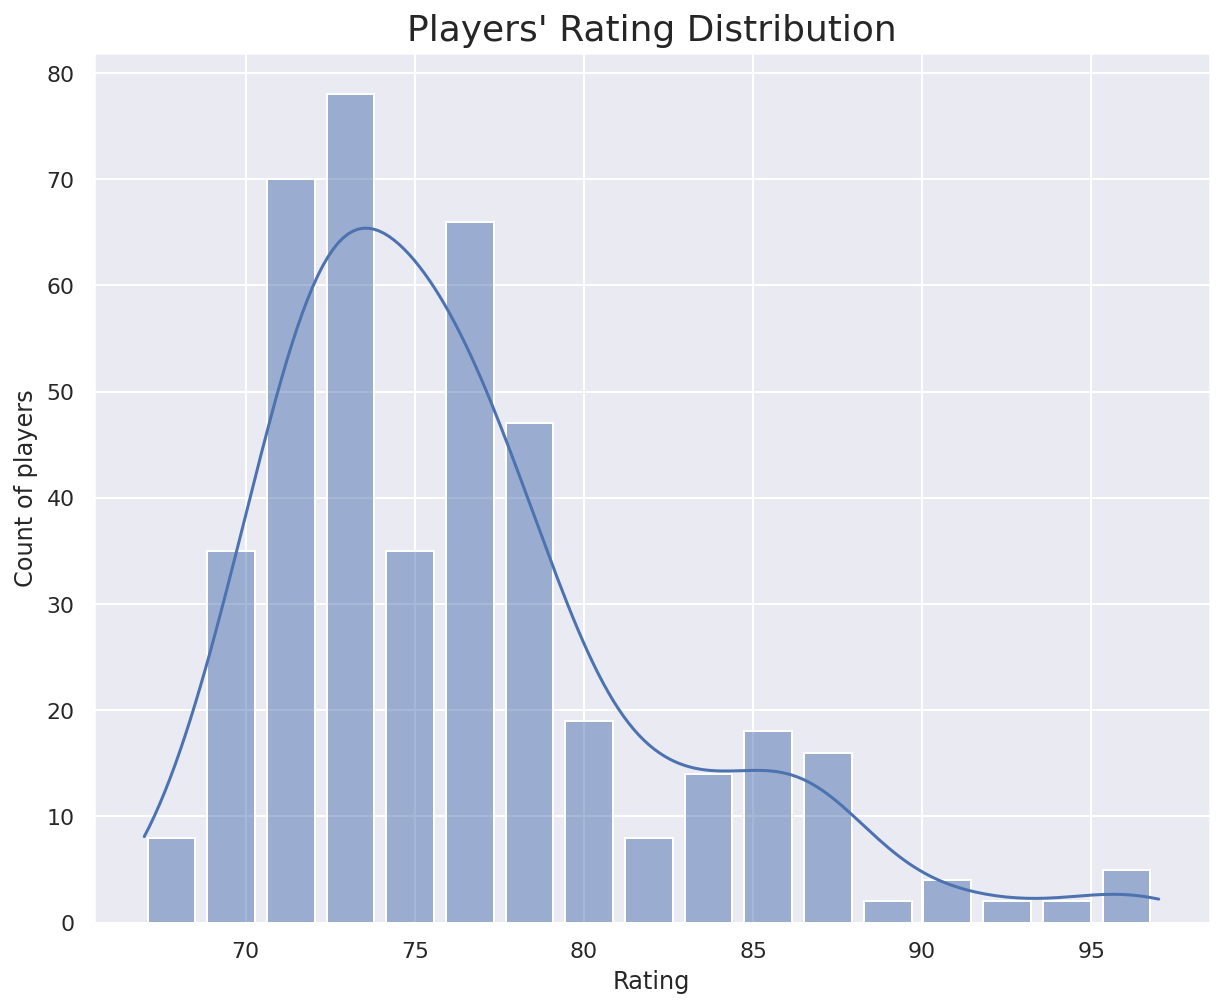

LeBron James is the highest rated -->> (97)
Duncan Robinson is the lowest rated -->> (67)


In [62]:
plt.rcParams['figure.figsize'] = (10, 8)
#distplot distribution plot, histplot histogram, kde = True >> the Line, shrink >> distance between the barcharts
sns.histplot(df_nba['rating'], color = 'b',kde = True, shrink = .8) 
plt.xlabel('Rating')
plt.ylabel('Count of players')
plt.title('Players\' Rating Distribution', fontsize=18)
plt.xticks()
plt.show()
print(f'{df_nba[df_nba.rating == df_nba.rating.max()].full_name.values[0]} is the highest rated -->> ({df_nba.rating.max()})')
print(f'{df_nba[df_nba.rating == df_nba.rating.min()].full_name.values[0]} is the lowest rated -->> ({df_nba.rating.min()})')

As shown in the graph, most of the players are rated among the 70s - 80s. Very few players are in the 90s and these players are considered superstars that are higly rated in the NBA.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


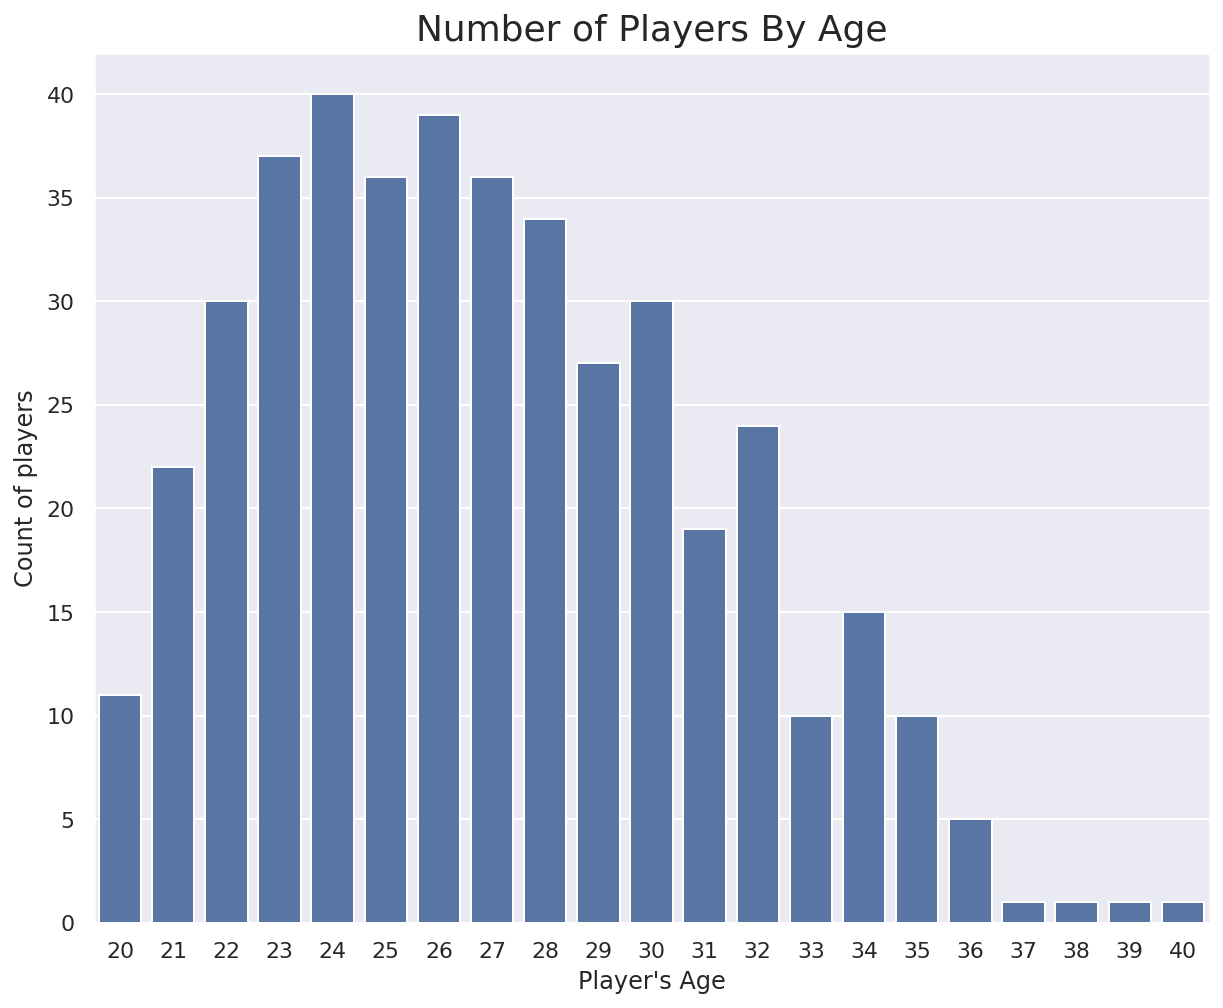

Pau Gasol is the oldest nba player -->> (40 years old)
Zion Williamson is the youngest nba players -->> (20 years old)


In [63]:
plt.rcParams['figure.figsize'] = (10, 8)
sns.countplot(df_nba['current_age'], color = 'b')
plt.xlabel('Player\'s Age')
plt.ylabel('Count of players')
plt.title('Number of Players By Age', fontsize=18)
plt.xticks()
plt.show()
print(f'{df_nba[df_nba.current_age == df_nba.current_age.max()].full_name.values[0]} is the oldest nba player -->> ({df_nba.current_age.max()} years old)')
print(f'{df_nba[df_nba.current_age == df_nba.current_age.min()].full_name.values[0]} is the youngest nba players -->> ({df_nba.current_age.min()} years old)')

Most of the players in the NBA are usually in their early 20s which are their prime years as they are in their peak physique and some experience in the league that can help them mentally in the long season games.

There are 10 players in a basketball game which are divided into 2 teams with 5 players in each team. A team consist of positions which are two Gs for guards, two Fs for forward and one C for centers. Below shows the positions and a brief explaination on what their traditional roles are in a team.

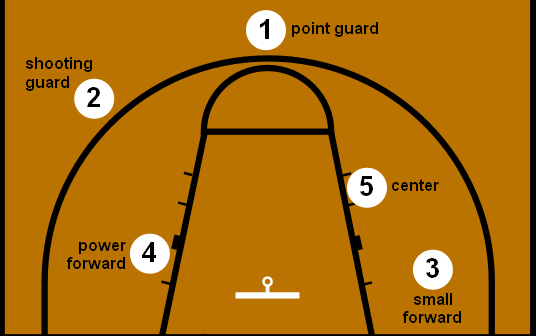

1.  Point Guard - These are players known as "Coach of the Floor". Their responsibility is to read the opponent team, assess their strength and weaknesses and lead the team to victory. The players in this position are usually the shortest ones in the team but have outstanding dribbling skills.

2. Shooting Guard - As the name suggests, the players in this positions are usually the ones that can score from the inside through penetration or shoot from mid-range and the three point line. They are usually fast, agile and have good shooting ability.

3. Small Forward - This position is the most versatile of all the five positions. The players of this position usually can do a little bit of everything on the court. This position requires the players to have a good mix of offensive and defensive skills. They can also be the main scorer of the team if necessary

4. Power Forward - Players of this position usually scores in the inside or form the midrange. They need to have good defensive ability to guard players in near to the basket. Their role is to be the extra muscle to snatch rebounds on the game.

5. Center - The centers are usually the tallest and the strongest player on the team. Their main role in the team is to get rebounds and block shots. Their usually have great defensive abilities and they are able to score the basket up close in the paint. 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


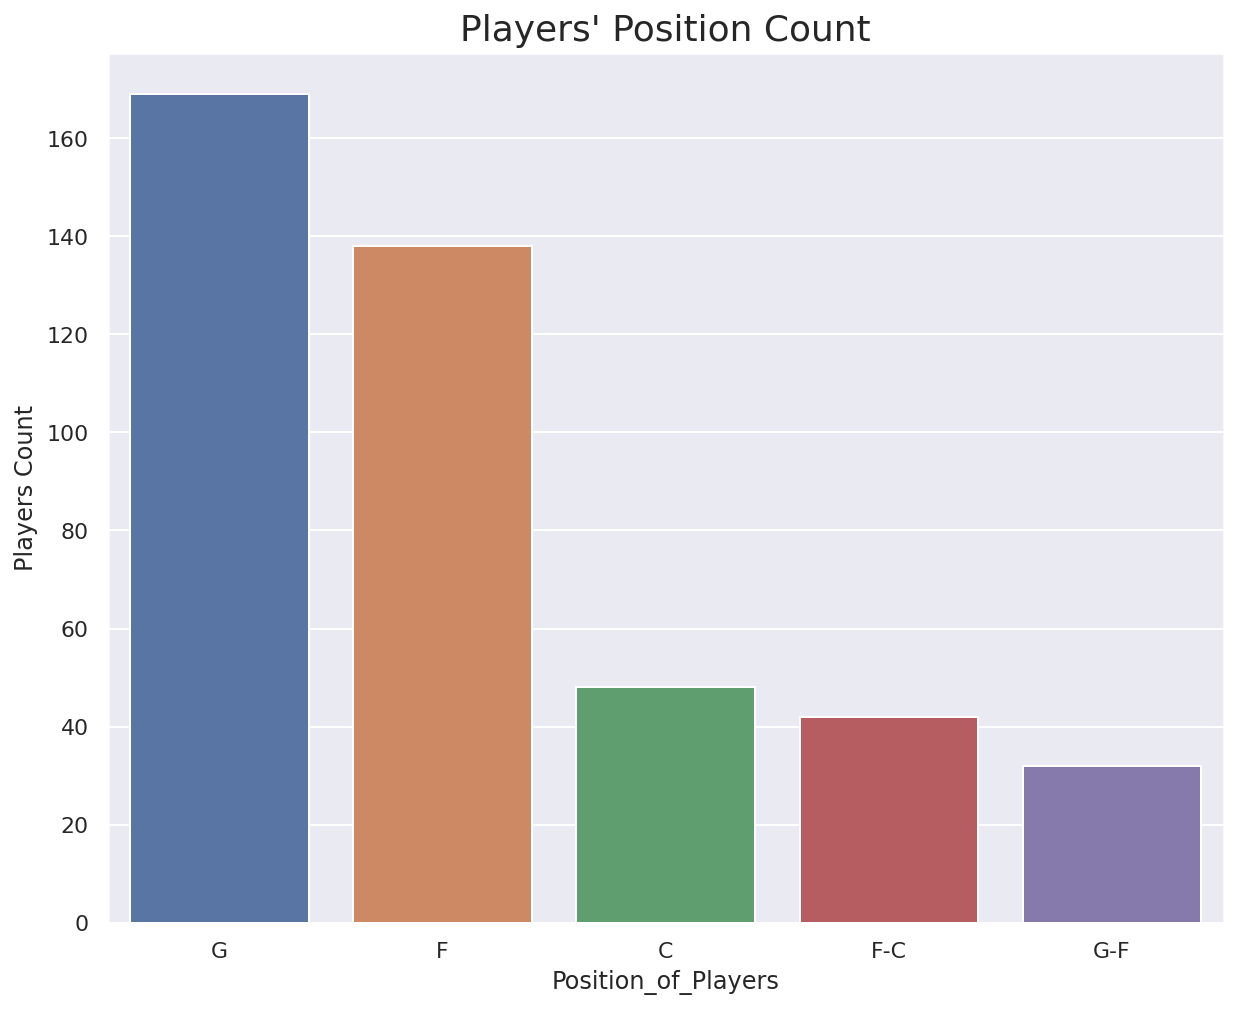

In [64]:
df_nba.loc[df_nba['position'] == 'C-F', 'position'] = 'F-C'
df_nba.loc[df_nba['position'] == 'F-G', 'position'] = 'G-F'
position = df_nba['position']
plt.rcParams['figure.figsize'] = (10, 8)
sns.countplot(position, order = df_nba['position'].value_counts().index)  #order = [] >> sorting
plt.xlabel('Position_of_Players')
plt.ylabel('Players Count')
plt.title('Players\' Position Count', fontsize=18)
plt.show()

The league consists of players that play the position of Guard - (Point Guard or Shooting Guard) most. Followed by players that play the Forward position - (Small Forward or Power Forward). There are also players that play two different position, F-C (Forward and Center) and also G-F (Guard and Forward).

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


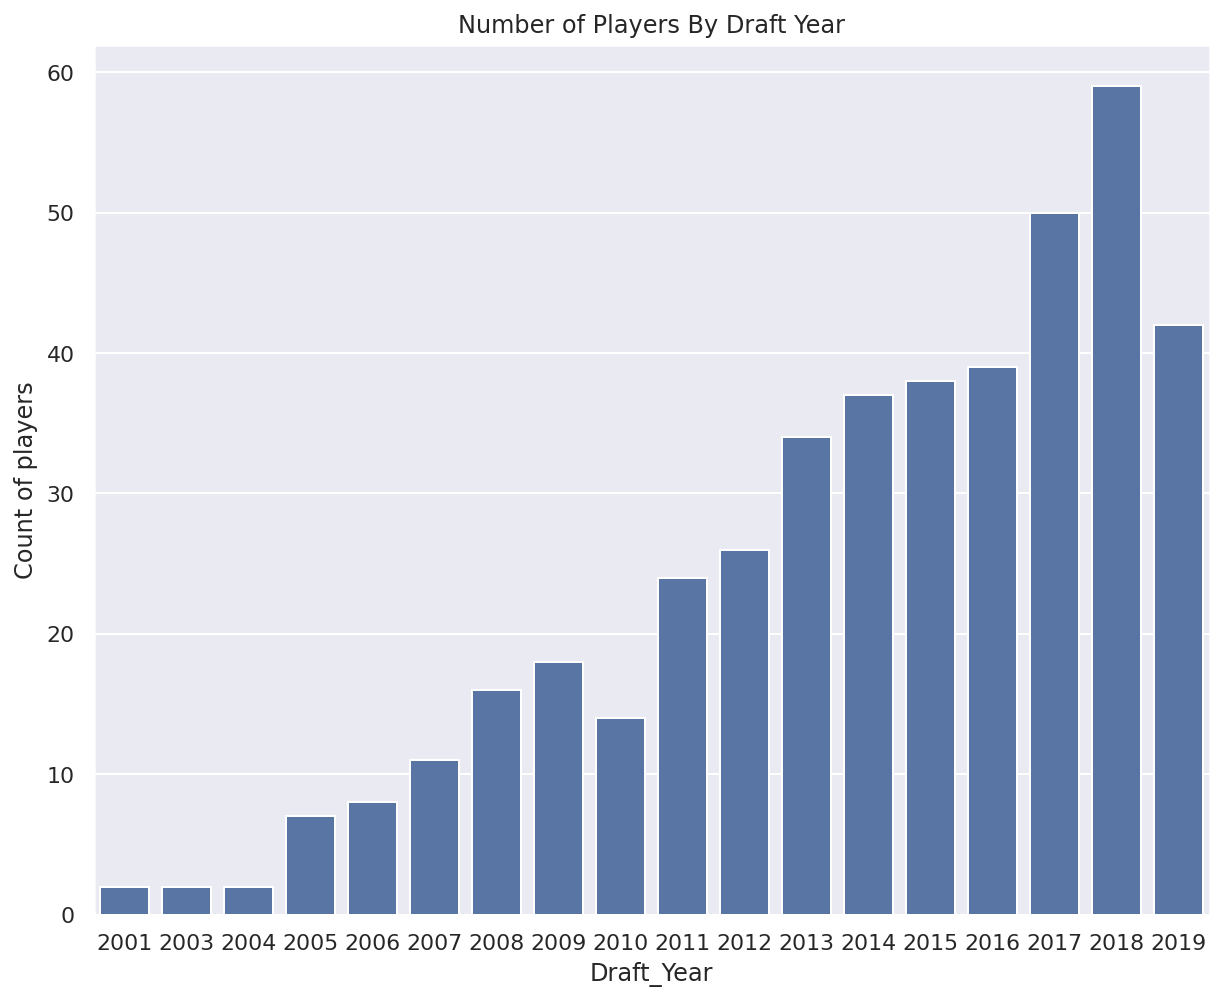

In [65]:
#draft year

plt.rcParams['figure.figsize'] = (10, 8)
sns.countplot(df_nba['draft_year'], color='b')
plt.xlabel('Draft_Year')
plt.ylabel('Count of players')
plt.title('Number of Players By Draft Year')
plt.xticks()
plt.show()

Players of the 2018 draft class are the most in the 2019/2020 season. Most of the players that are drafted in the early 2000s are mostly retired because of their age. 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

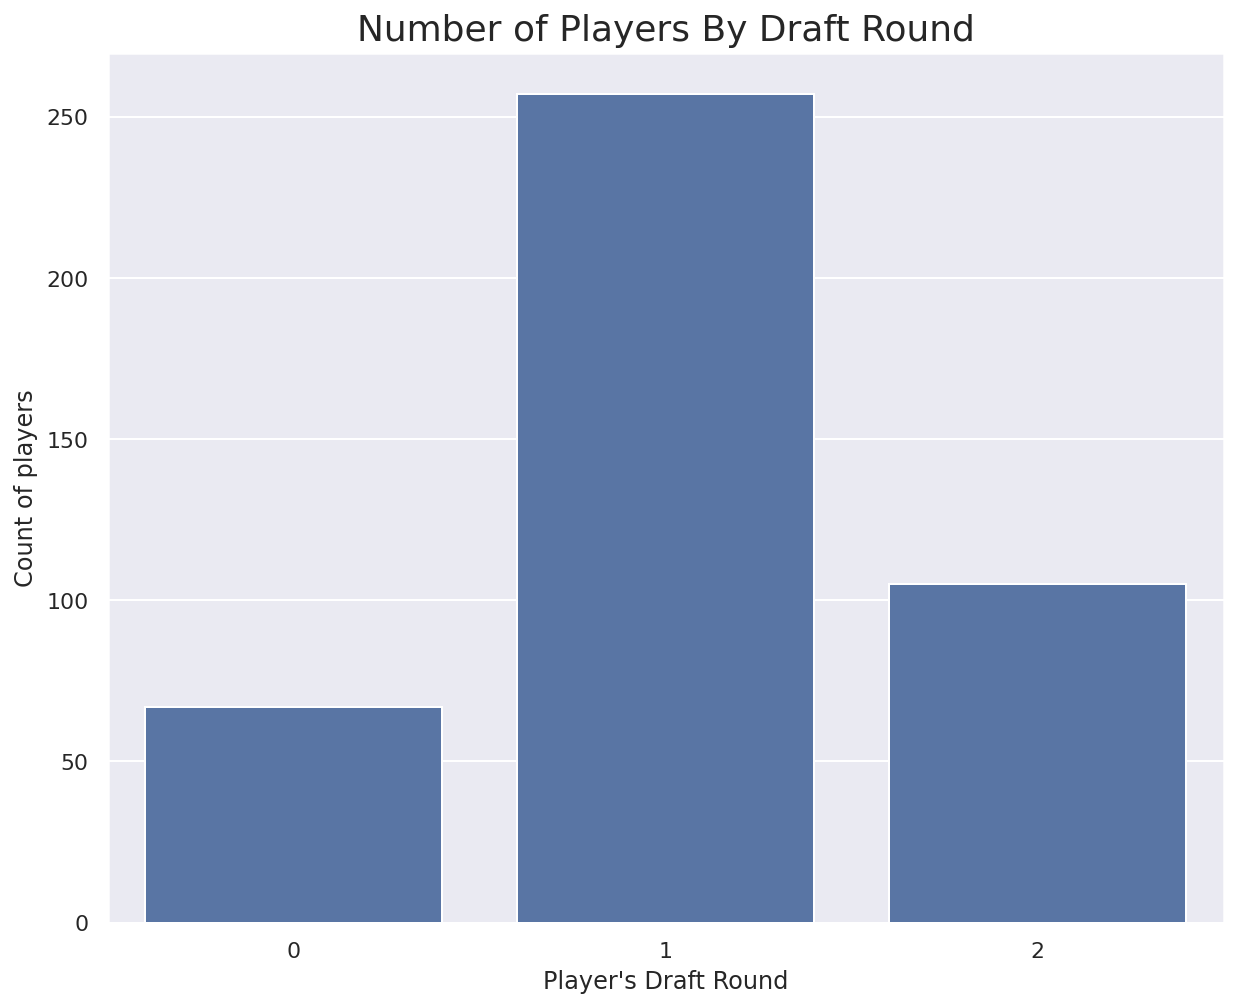

In [66]:
#draft round

plt.rcParams['figure.figsize'] = (10, 8)
sns.countplot(df_nba['draft_round'], color = 'b')
plt.xlabel('Player\'s Draft Round')
plt.ylabel('Count of players')
plt.title('Number of Players By Draft Round', fontsize=18)
plt.xticks()

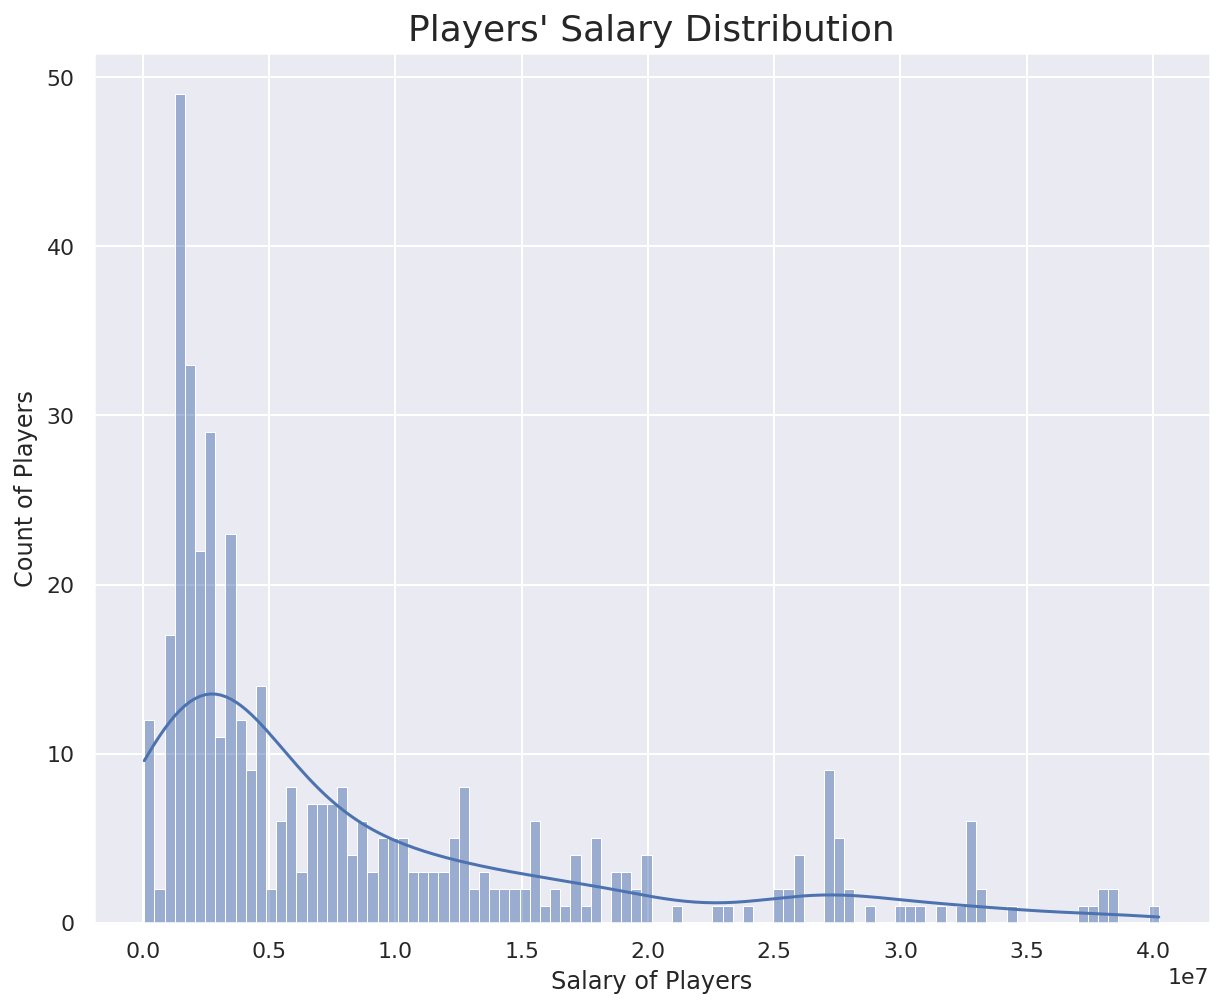

In [67]:
#salary distribution

df_nba['salary'] = df_nba['salary'].astype(str).str.replace('$', '')
df_nba['salary'] = df_nba['salary'].astype(np.float64)

plt.rcParams['figure.figsize'] = (10, 8)
sns.histplot(df_nba['salary'], color = 'b', kde = True, bins = 100)
plt.xlabel('Salary of Players')
plt.ylabel('Count of Players')
plt.title('Players\' Salary Distribution',fontsize=18)
plt.xticks()
plt.show()

More players have the salary range of $1 - $500k according to the graph. A lot of players have a salary of less than $1m. 

Text(0.5, 1.0, 'Salary distribution based on teams')

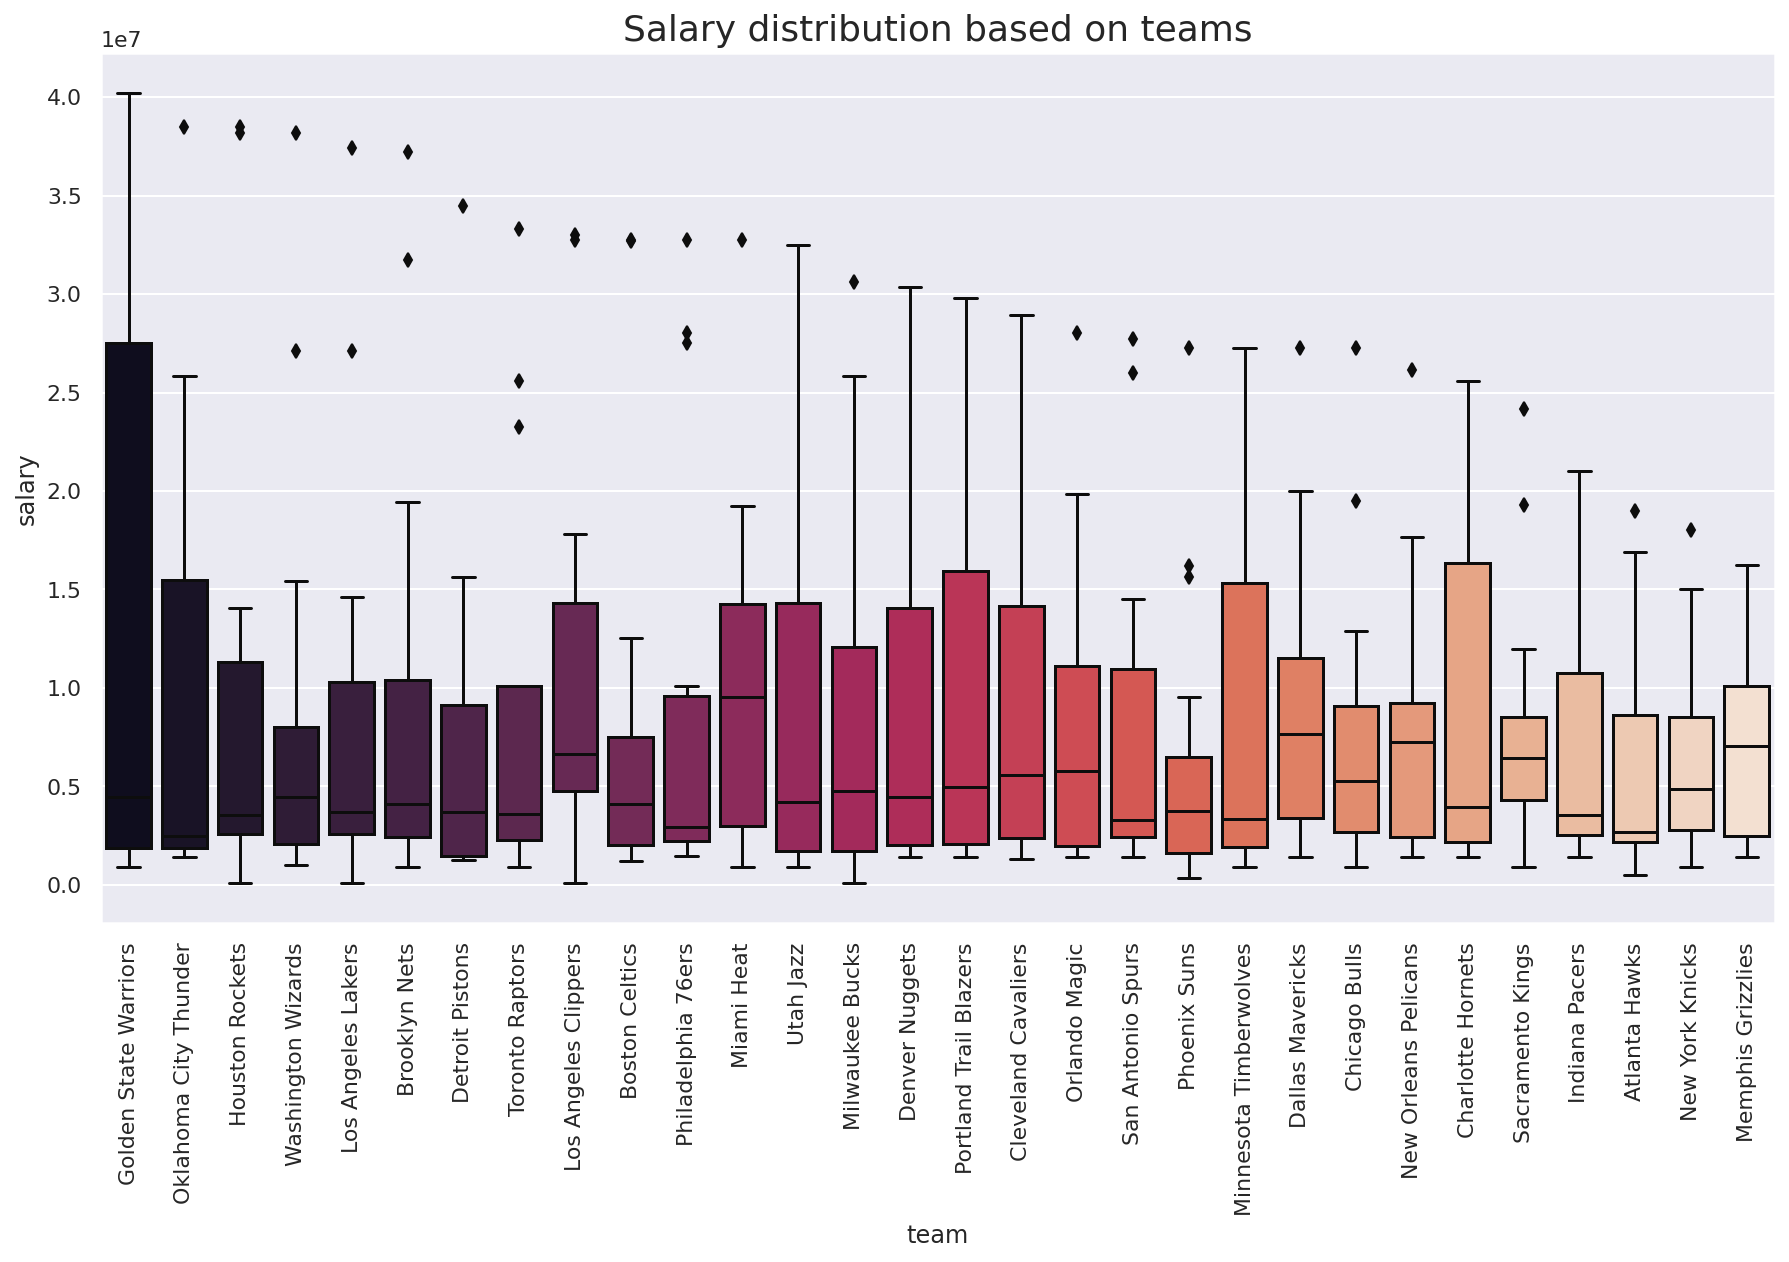

In [68]:
salary_sort = df_nba[['team','salary']].sort_values(by='salary', ascending=False)

plt.rcParams['figure.figsize'] = (15, 8)
salary_sort.reset_index(inplace=True)
x = sns.boxplot(x='team', y='salary', data=salary_sort, palette='rocket')
x.set_xticklabels(x.get_xticklabels(), rotation=90)
plt.title('Salary distribution based on teams', fontsize=18)

In [69]:
df_nba.iloc[df_nba.groupby(df_nba['team'])['salary'].idxmax()].reset_index().sort_values(by='salary', ascending=False).reset_index()[['full_name','team', 'rating', 'salary']]

,full_name,team,rating,salary
0,Stephen Curry,Golden State Warriors,95,40231758.0
1,Chris Paul,Oklahoma City Thunder,85,38506482.0
2,Russell Westbrook,Houston Rockets,90,38506482.0
3,John Wall,Washington Wizards,86,38199000.0
4,LeBron James,Los Angeles Lakers,97,37436858.0
5,Kevin Durant,Brooklyn Nets,96,37199000.0
6,Blake Griffin,Detroit Pistons,88,34449964.0
7,Kyle Lowry,Toronto Raptors,85,33296296.0
8,Paul George,Los Angeles Clippers,93,33005556.0
9,Tobias Harris,Philadelphia 76ers,85,32742000.0


The table shows the most paid players on each team with the highest paid player in the league on the 2019/2020 is Stephen Curry.

In [70]:
df_nba.iloc[df_nba.groupby(df_nba['team'])['rating'].idxmax()].reset_index().sort_values(by='rating', ascending=False).reset_index()[[ 'full_name','position','team', 'rating']]

,full_name,position,team,rating
0,Kawhi Leonard,F,Los Angeles Clippers,97
1,LeBron James,F,Los Angeles Lakers,97
2,Giannis Antetokounmpo,G-F,Milwaukee Bucks,96
3,Kevin Durant,F,Brooklyn Nets,96
4,James Harden,G,Houston Rockets,96
5,Stephen Curry,G,Golden State Warriors,95
6,Damian Lillard,G,Portland Trail Blazers,92
7,Joel Embiid,C,Philadelphia 76ers,91
8,Nikola Jokic,C,Denver Nuggets,90
9,Karl-Anthony Towns,F-C,Minnesota Timberwolves,89


Comparing both the tables above, Most of the most paid players are the highest rated players on the team. This is a pattern that we expect because from the correlation table, the rating and the salary of a player has a very strong correlation.

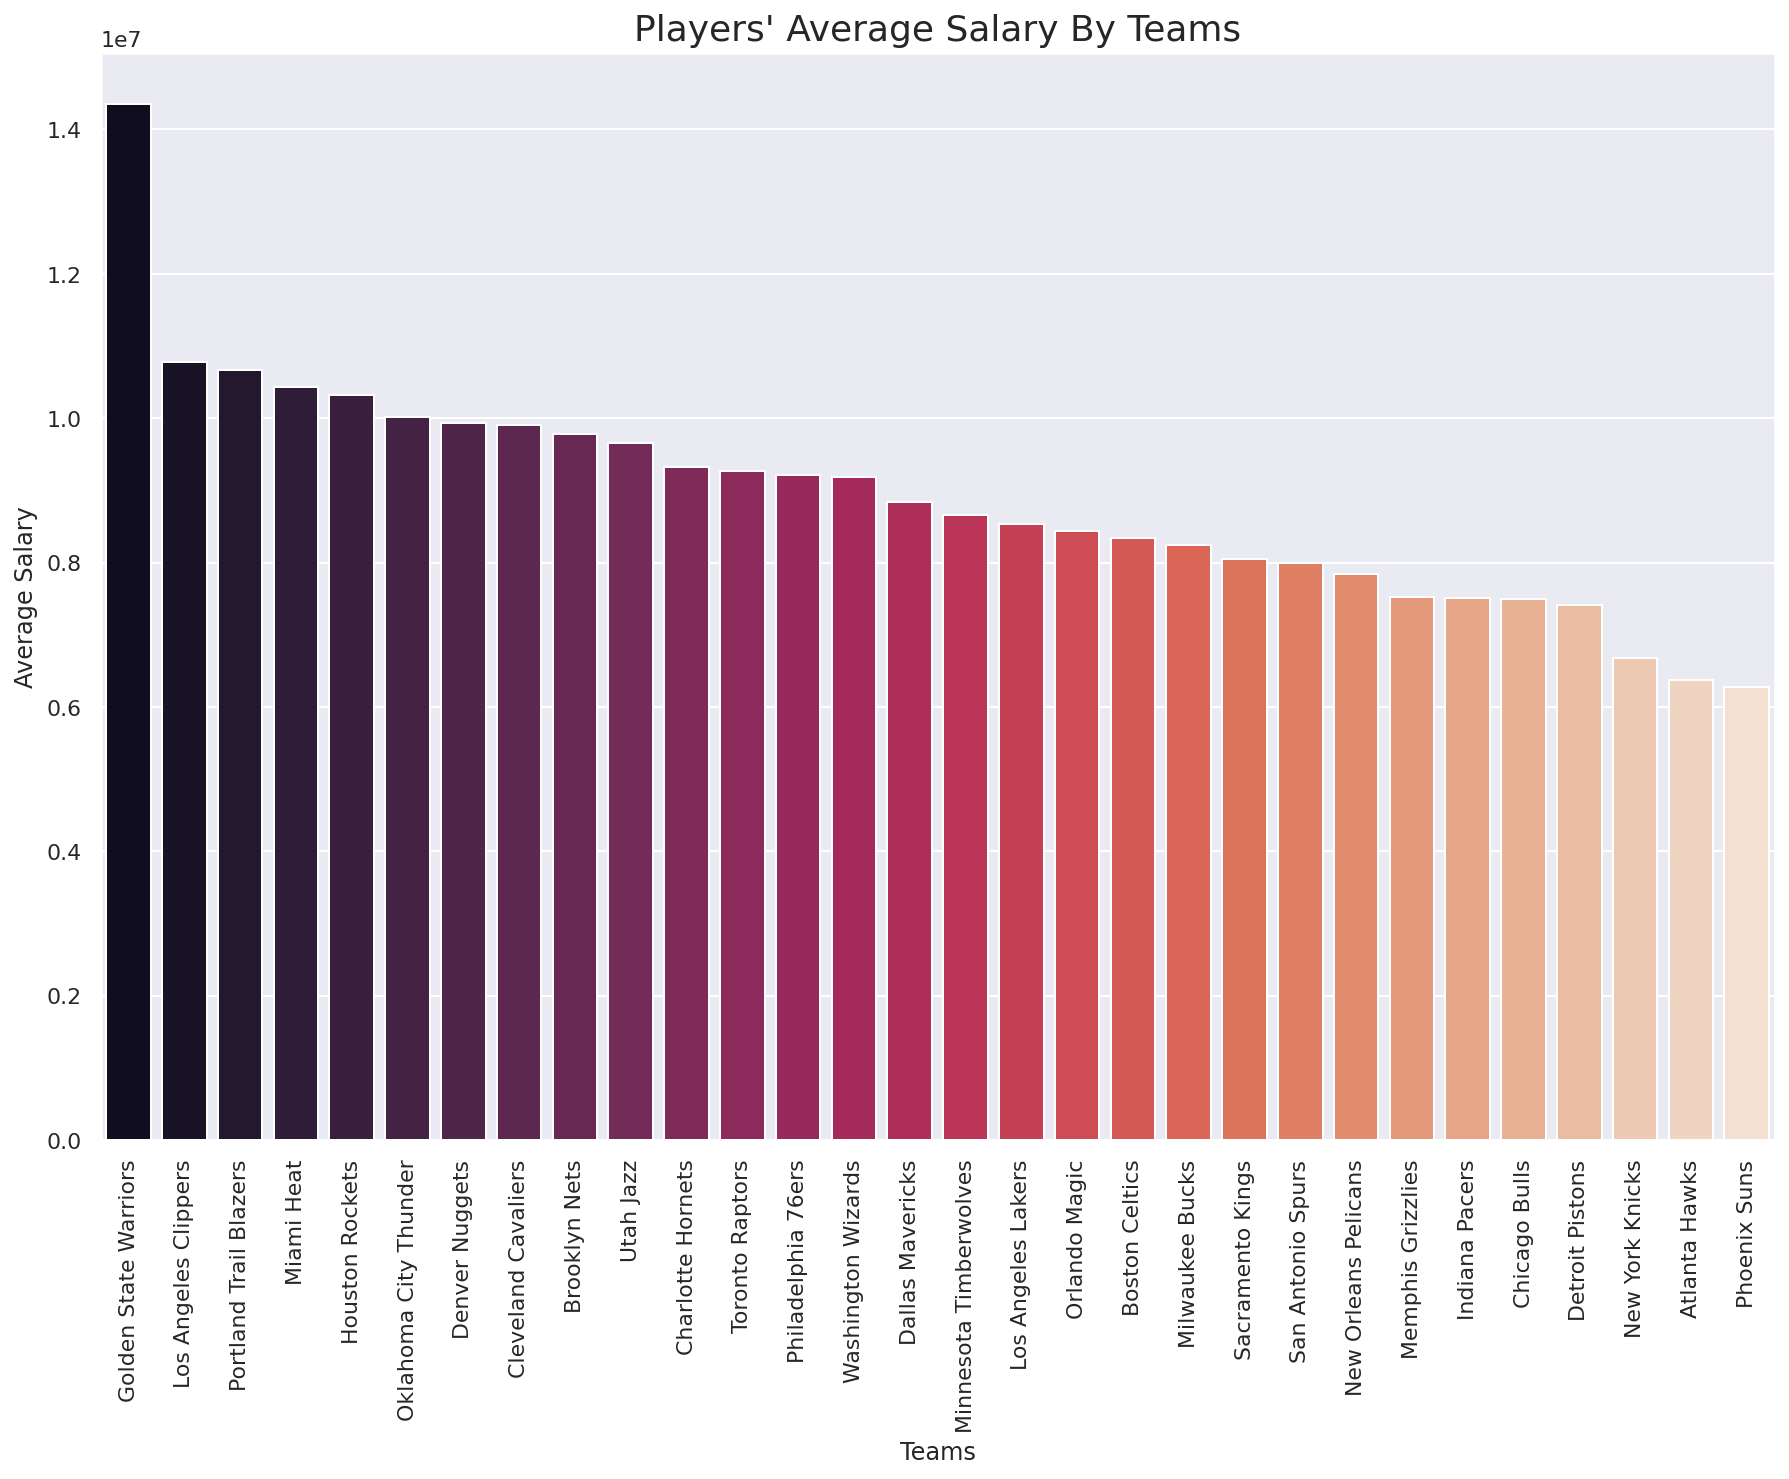

In [71]:
salary_avg = df_nba[['team','salary']].groupby('team').mean().sort_values(by='salary', ascending=False)
plt.figure(figsize=(15, 10))
sns.barplot(x = salary_avg.index, y=salary_avg.salary, data = df_nba, palette='rocket')
plt.xticks(rotation=90)
plt.xlabel('Teams')
plt.ylabel('Average Salary')
plt.title('Players\' Average Salary By Teams',fontsize=18)
plt.show()

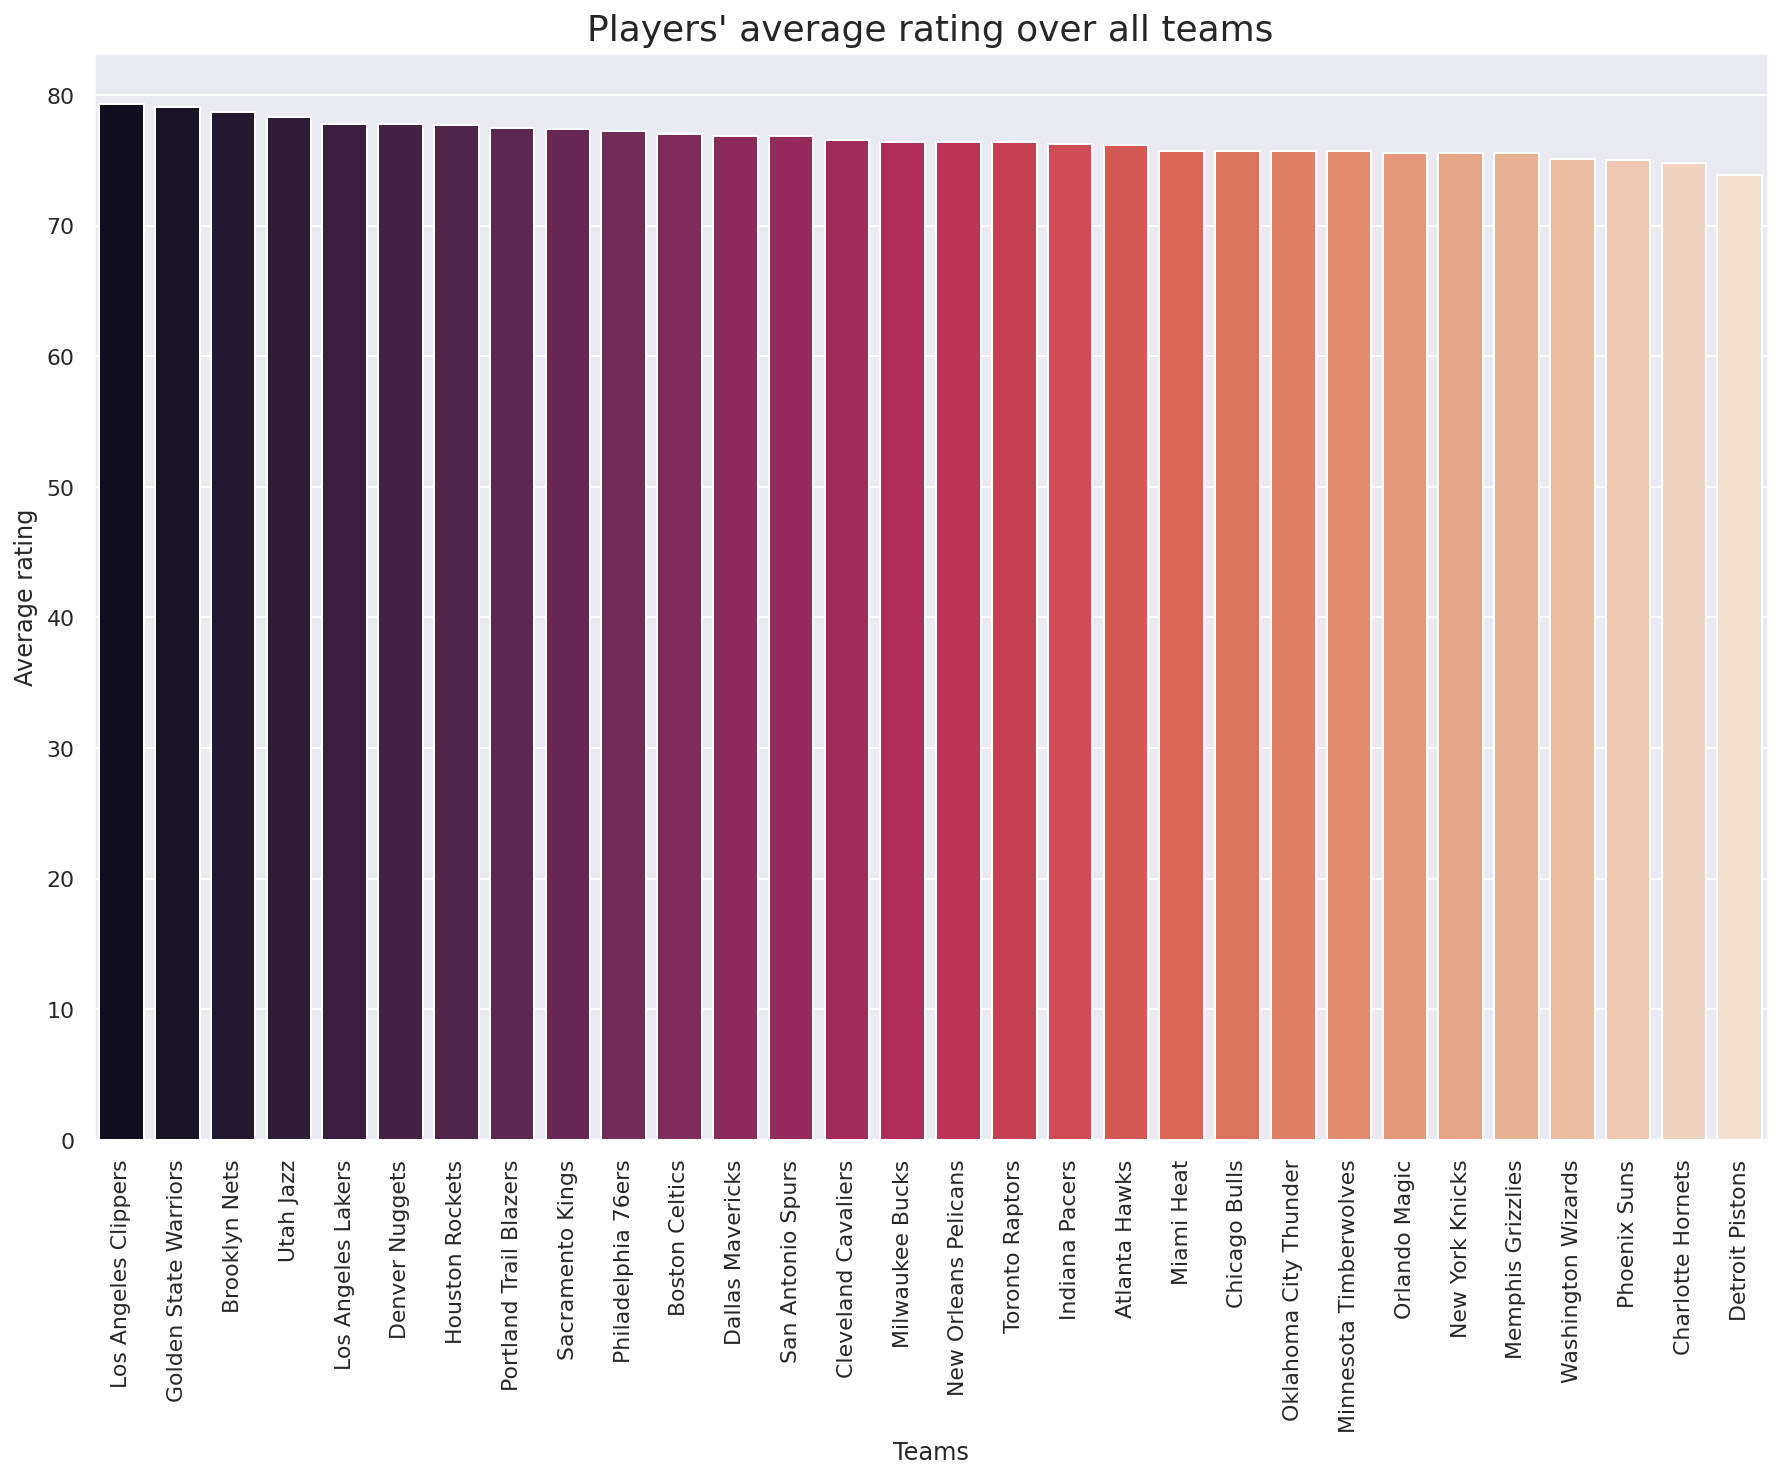

In [72]:
#average rating for every team
team_avg = df_nba[['team','rating']].groupby('team').mean().sort_values(by='rating', ascending=False)
plt.figure(figsize=(15, 10))
sns.barplot(x = team_avg.index, y=team_avg.rating, data = df_nba, palette='rocket')
plt.xticks(rotation=90)
plt.xlabel('Teams')
plt.ylabel('Average rating')
plt.title('Players\' average rating over all teams',fontsize=18)
plt.show()

It is known that an individual player's rating is strongly correlated to the salary of the player. The higher rated the player is, the higher salary he has. The average rating of a team however shows a different pattern. The higher the average salary for the team does not mean the higher the average rating of the team. 

In [73]:
print(df_nba['team'].value_counts())

Milwaukee Bucks           17
Phoenix Suns              16
Los Angeles Lakers        15
Orlando Magic             15
Indiana Pacers            15
Chicago Bulls             15
Dallas Mavericks          15
New Orleans Pelicans      15
New York Knicks           15
Brooklyn Nets             14
Philadelphia 76ers        14
Sacramento Kings          14
Detroit Pistons           14
Los Angeles Clippers      14
San Antonio Spurs         14
Boston Celtics            14
Oklahoma City Thunder     13
Washington Wizards        13
Denver Nuggets            13
Toronto Raptors           13
Houston Rockets           13
Minnesota Timberwolves    13
Memphis Grizzlies         13
Atlanta Hawks             12
Utah Jazz                 12
Miami Heat                12
Portland Trail Blazers    12
Cleveland Cavaliers       12
Charlotte Hornets         10
Golden State Warriors      9
Name: team, dtype: int64


The average rating for the Los Angeles Clippers are the highest followed by the Golden State Warriors and Brooklyn Nets. The three highest average team has a player with ratings in the high 90s. This may be a reason why their teams have a high average rating. 

Although another reason for GSW to be the number 2 highest rated team is also due to the low player count in the team which is the 9 players only. Lower player count can be a factor for higher average rating.

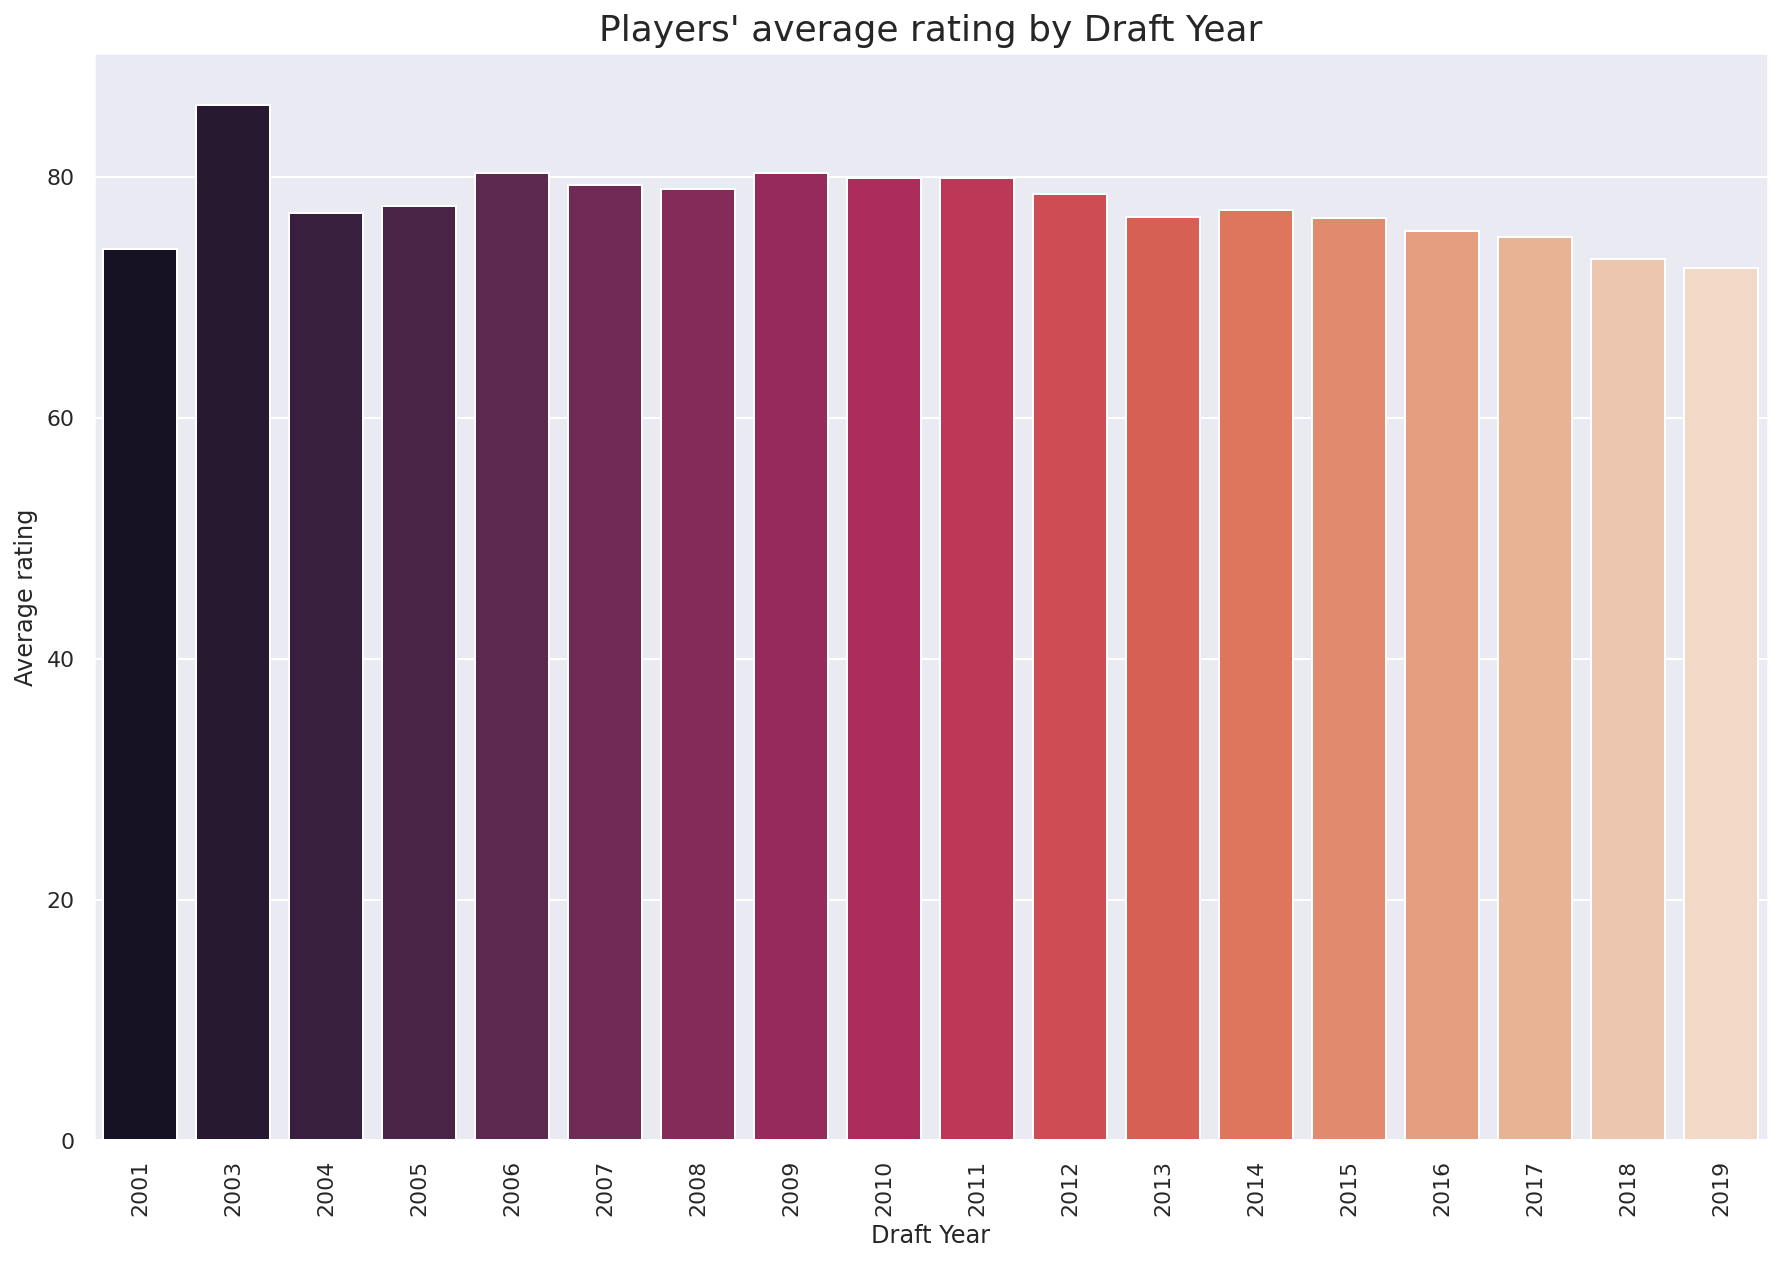

In [74]:
#average rating by draft year

draft_year_avg = df_nba[['draft_year','rating']].groupby('draft_year').mean().sort_values(by='rating', ascending=False)
plt.figure(figsize=(15, 10))
sns.barplot(x = draft_year_avg.index, y=draft_year_avg.rating, data = df_nba, palette='rocket')
plt.xticks(rotation=90)
plt.xlabel('Draft Year')
plt.ylabel('Average rating')
plt.title('Players\' average rating by Draft Year', fontsize=18)
plt.show()

The players from draft year - 2003 have the highest average among all the draft years.

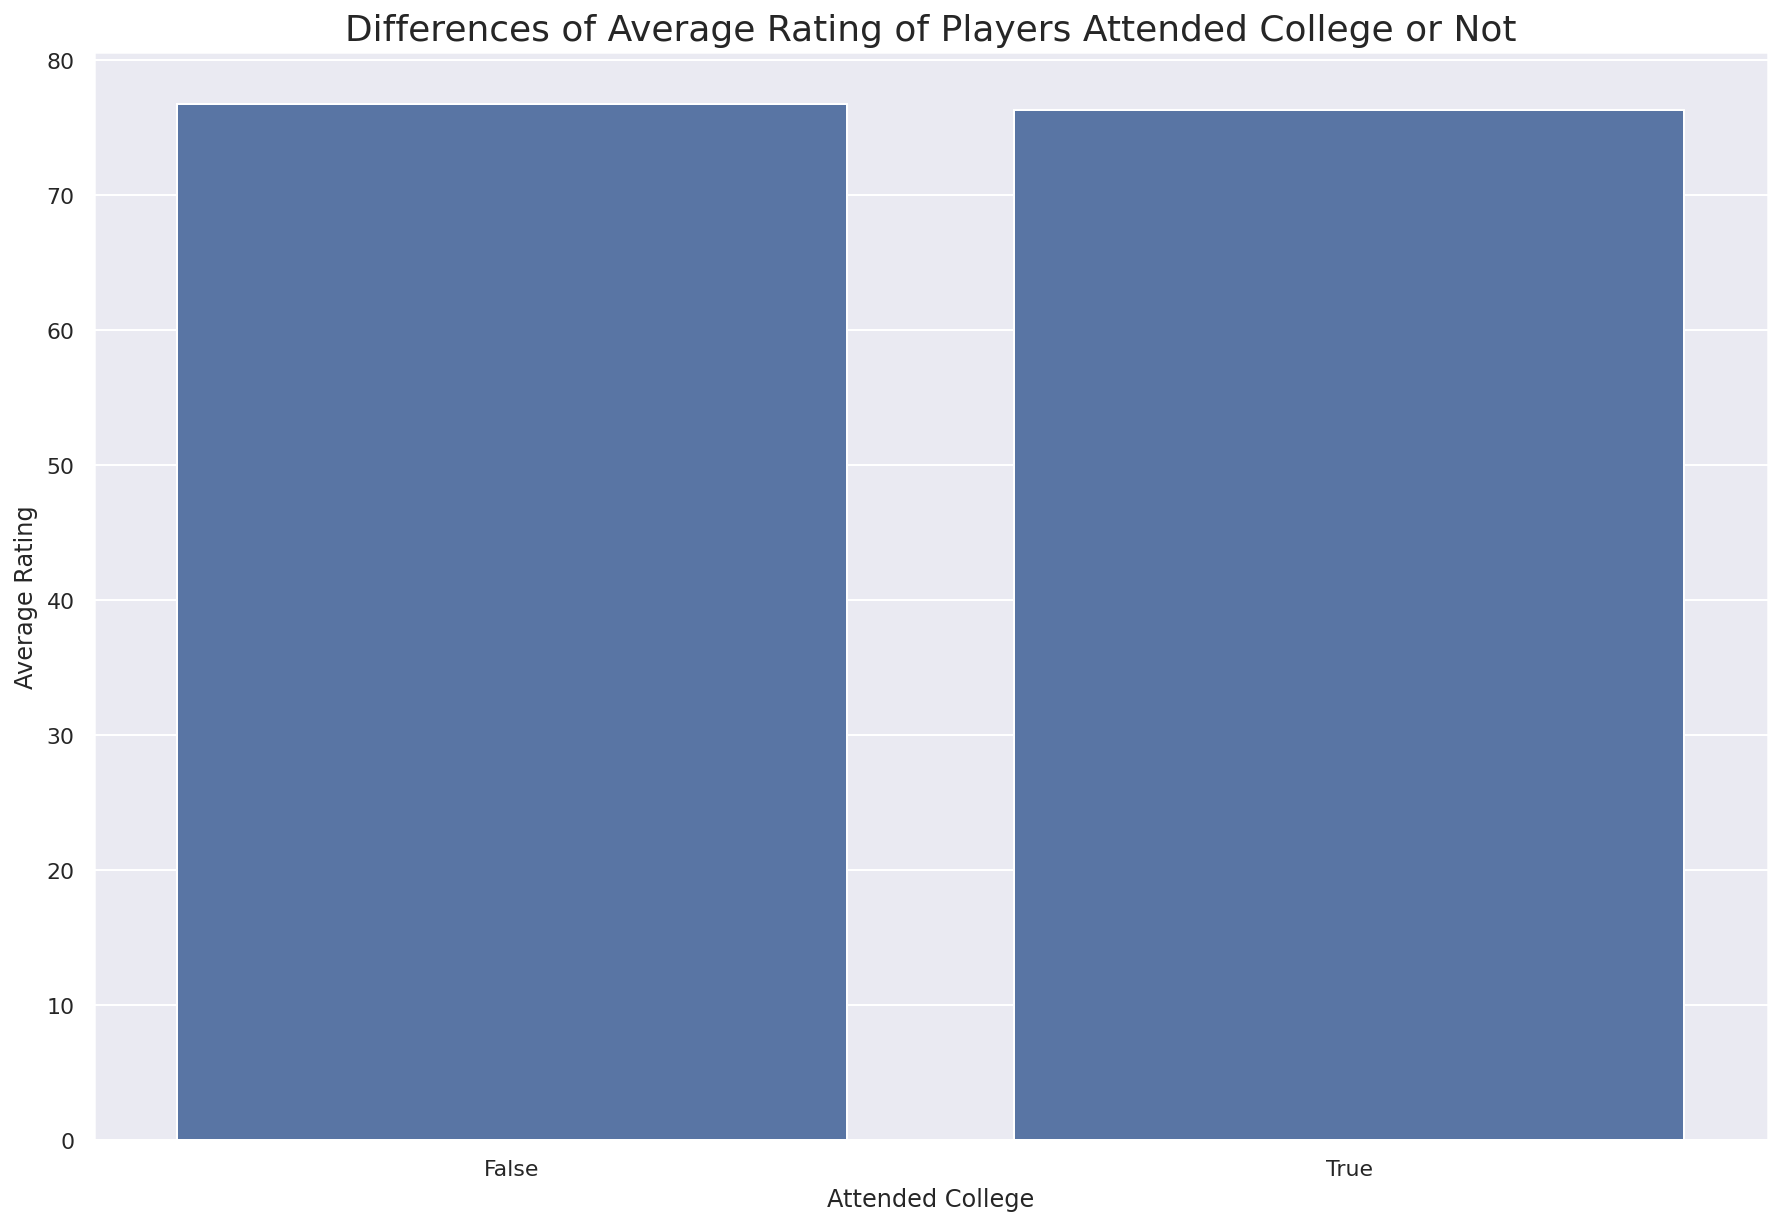

In [75]:
# college and non-college
college_avg = df_nba[['attended_college','rating']].groupby('attended_college').mean()
plt.figure(figsize=(15, 10))
sns.barplot(x = college_avg.index, y=college_avg.rating, data = df_nba, color='b')
plt.xlabel('Attended College')
plt.ylabel('Average Rating')
plt.title('Differences of Average Rating of Players Attended College or Not' ,fontsize=18)
plt.show()

The graph above shows that the rating of a player is not really affect whether or not the players attend college. The average rating is alsmot similar to each other. 

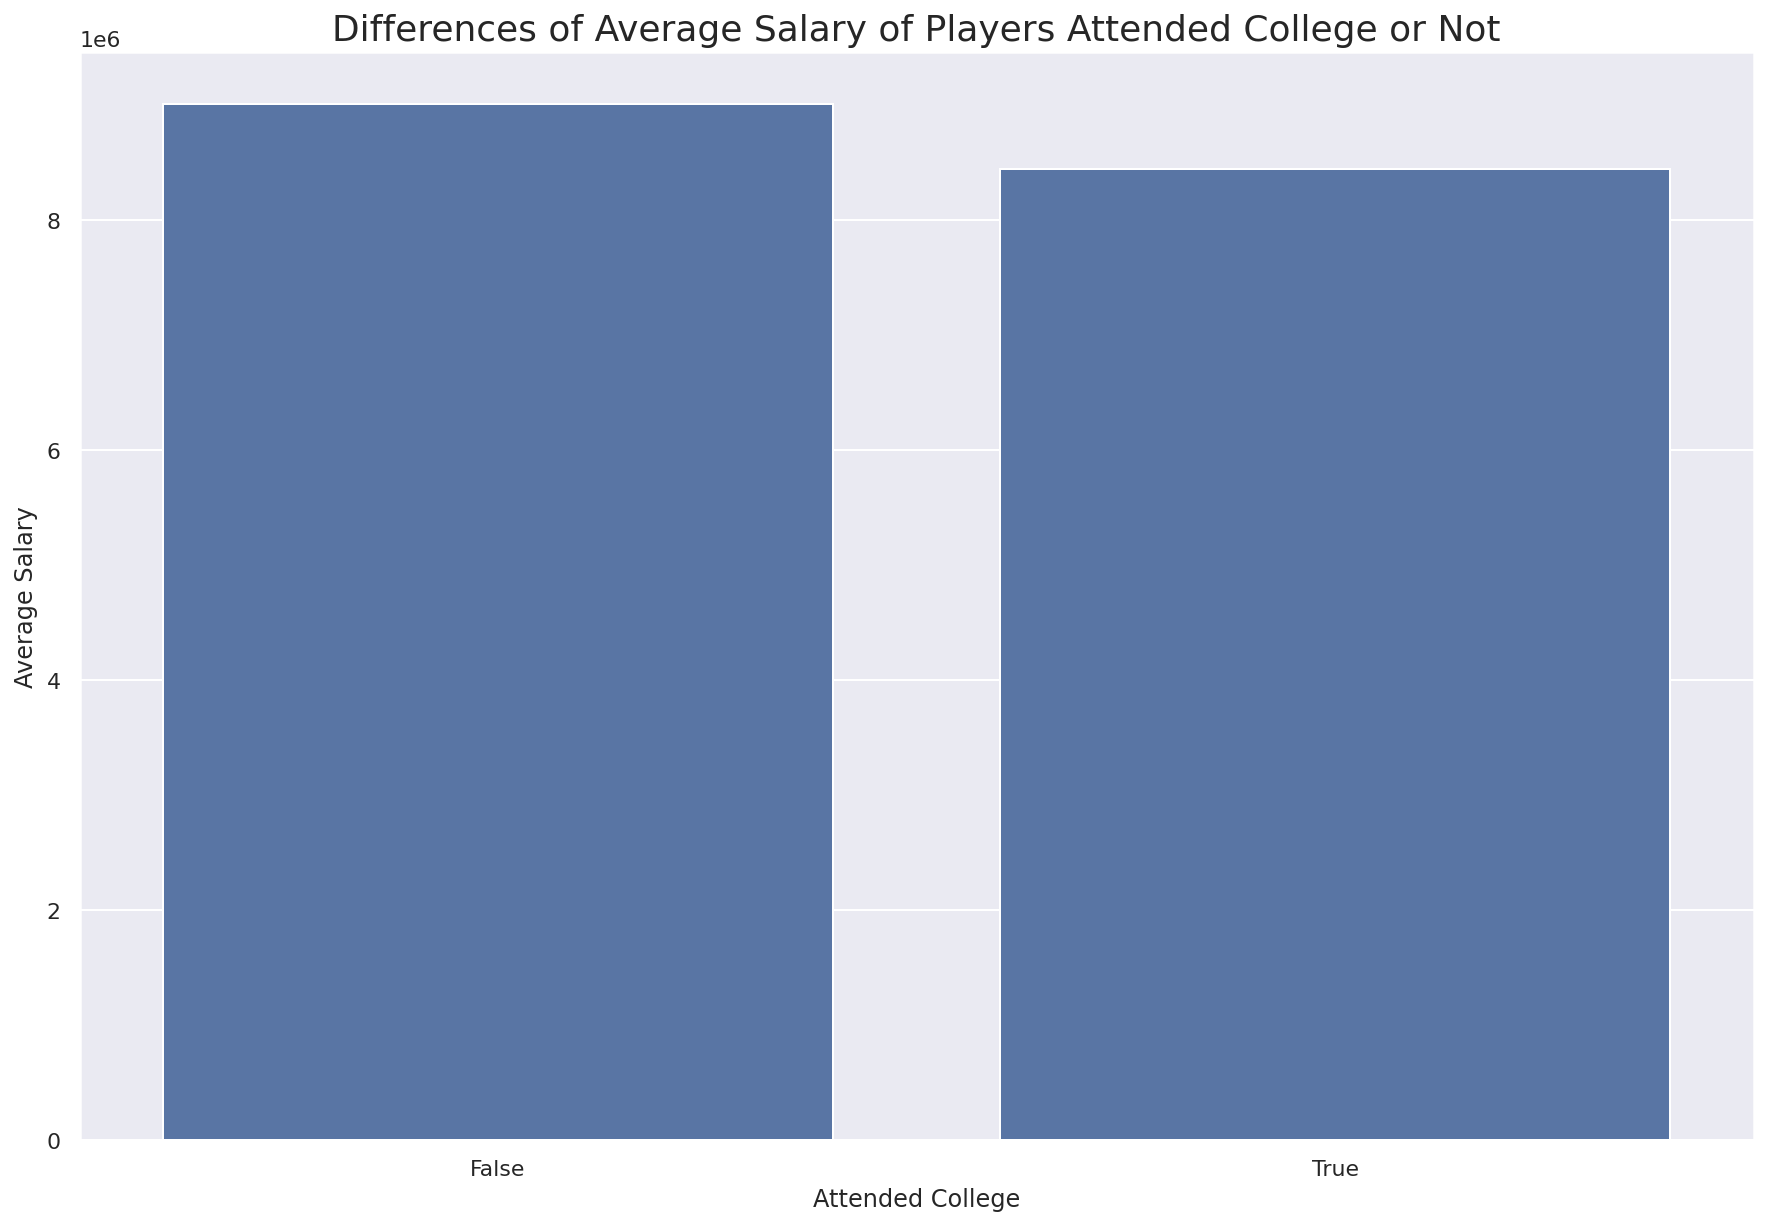

In [76]:
# college and non-college
salary_avg = df_nba[['attended_college','salary']].groupby('attended_college').mean()
plt.figure(figsize=(15, 10))
sns.barplot(x = salary_avg.index, y=salary_avg.salary, data = df_nba, color='b')
plt.xlabel('Attended College')
plt.ylabel('Average Salary')
plt.title('Differences of Average Salary of Players Attended College or Not' ,fontsize=18)
plt.show()

The average salary however has small differences. The players that went to the NBA directly has a higher average salary than the players that attended college.

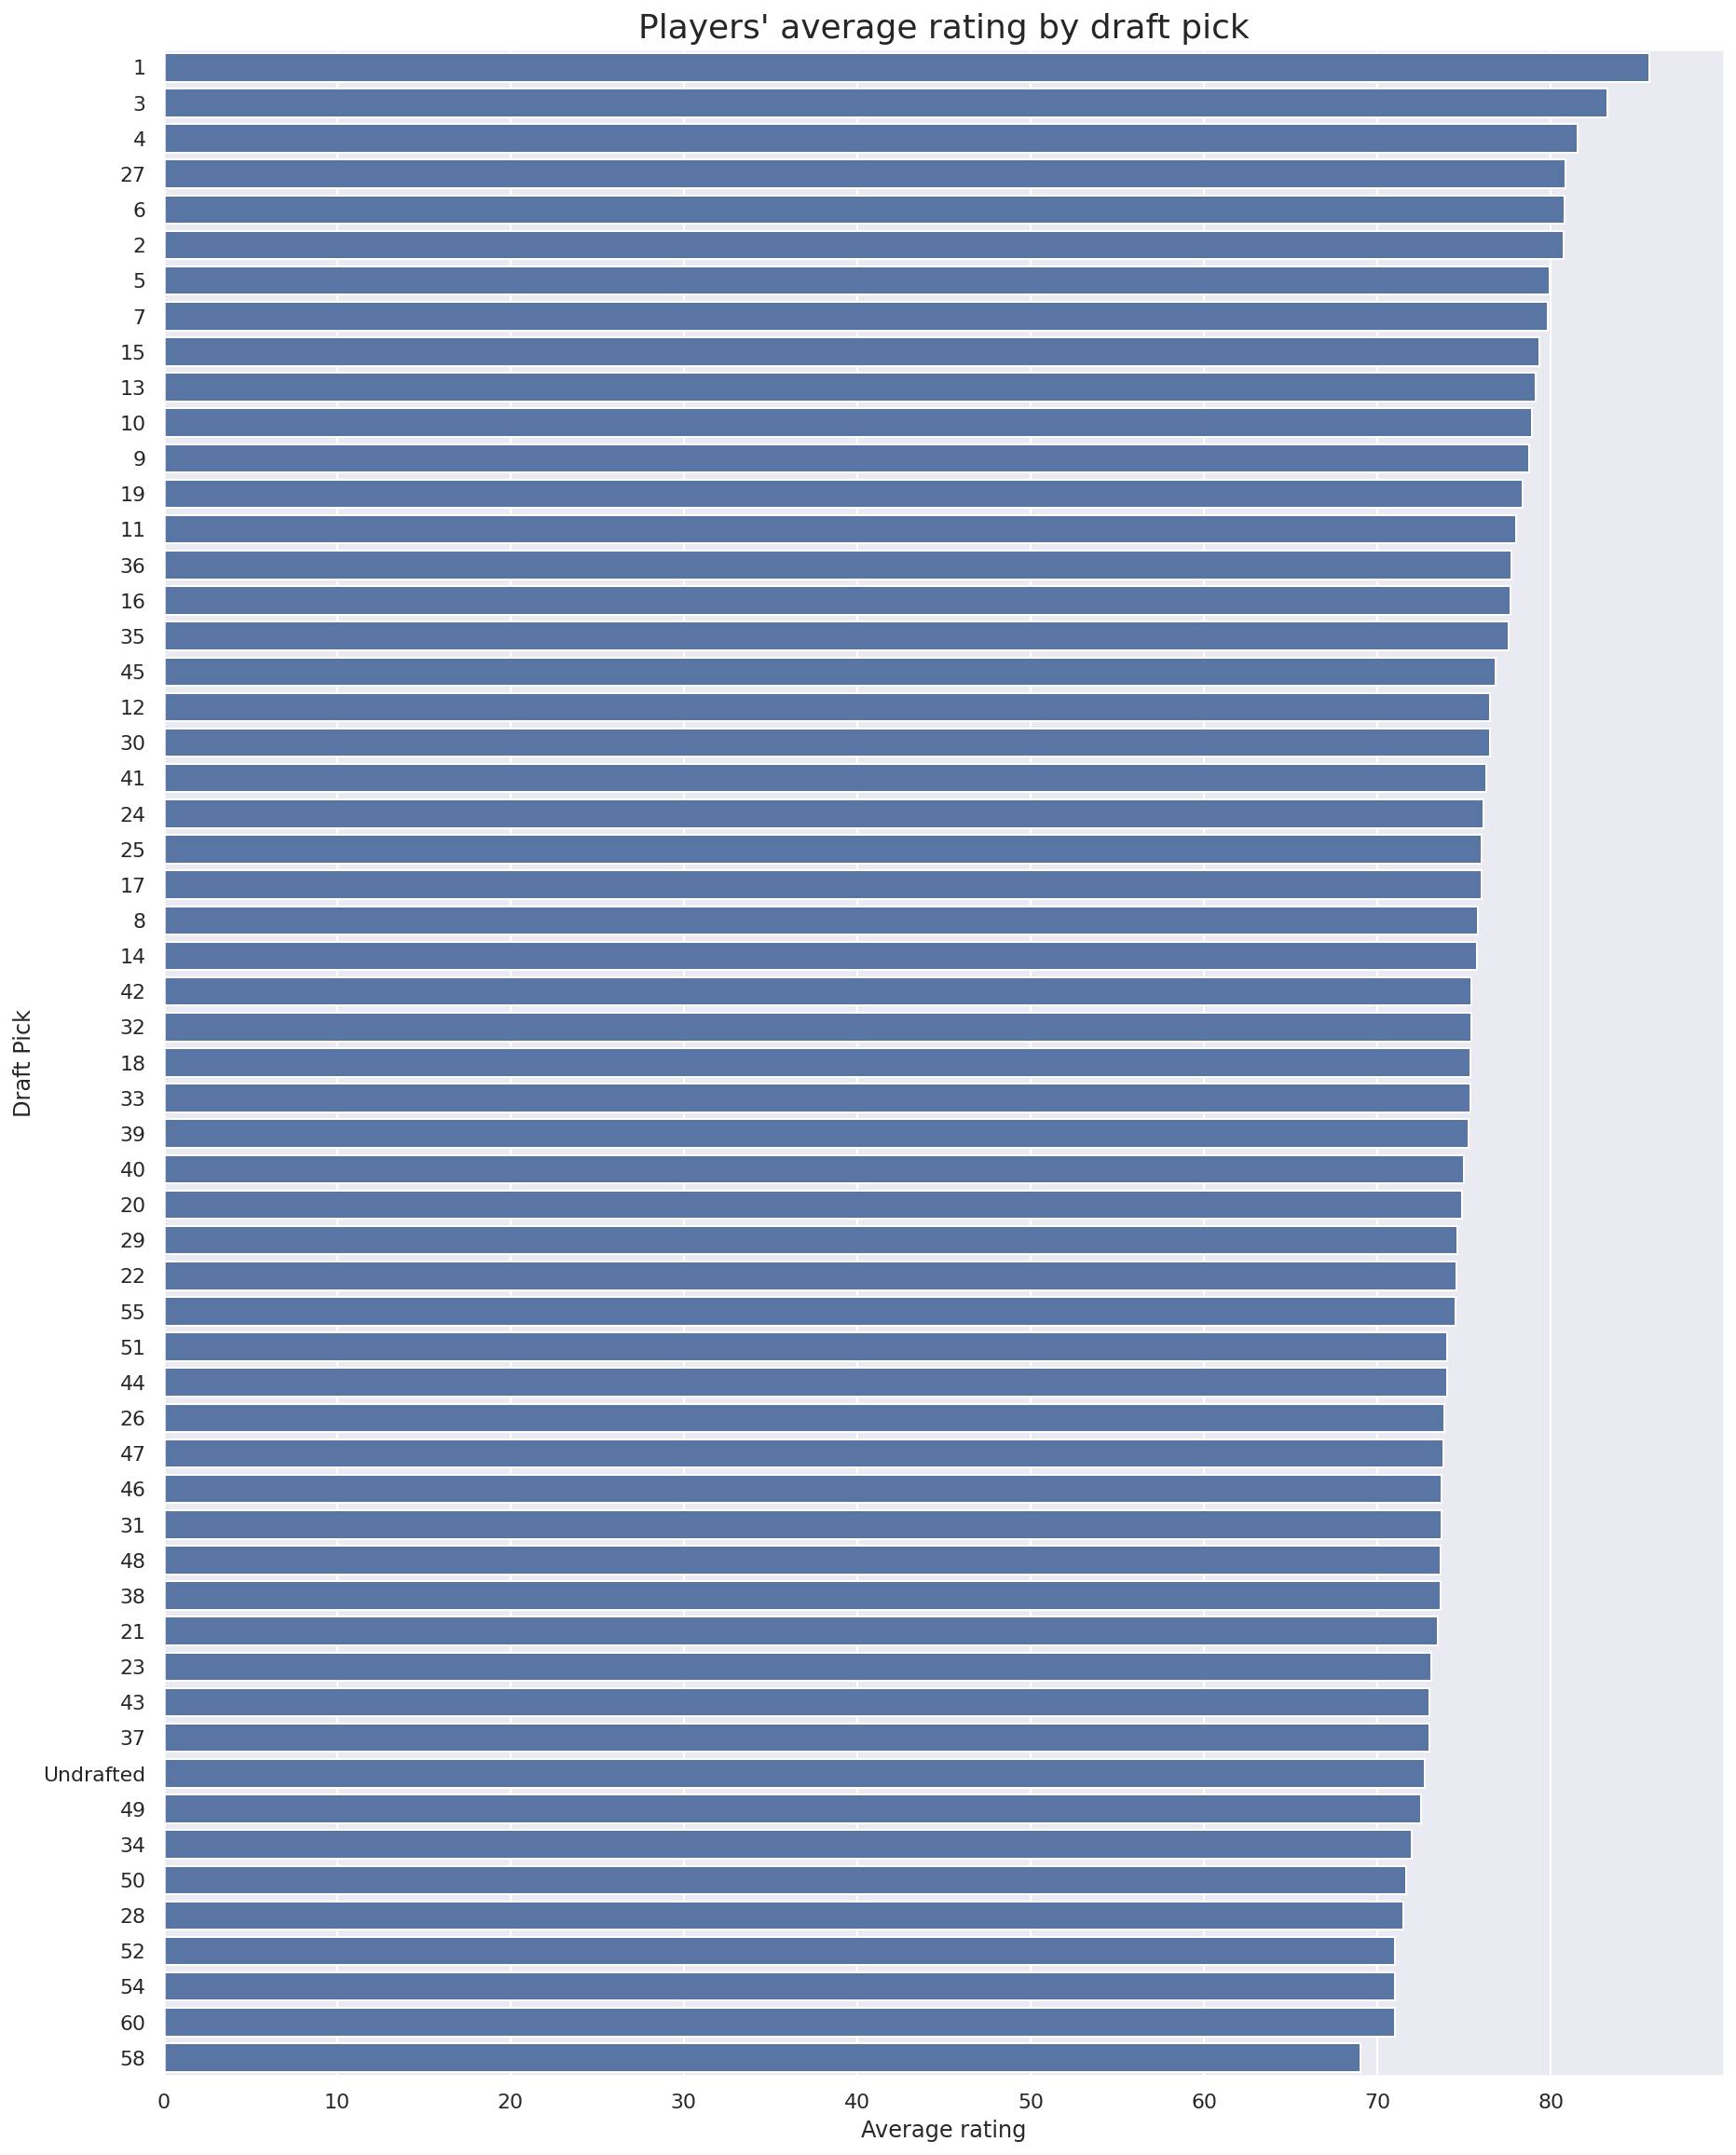

In [77]:
#average rating by draft pick

draft_pick_avg = df_nba[['draft_pick','rating']].groupby('draft_pick').mean().sort_values(by='rating', ascending=False)
plt.figure(figsize=(15, 20))
sns.barplot(x = draft_pick_avg.rating, y=draft_pick_avg.index, data = df_nba, color='b')
plt.xlabel('Average rating')
plt.ylabel('Draft Pick')
plt.title('Players\' average rating by draft pick',fontsize=18)
plt.show()

The highest average rating for draft pick is the pick #1 which is to be expected because usually higher rated players are usually pick first by teams. The graphs shows that the higher draft pick has higher rating except for draft pick #27 being 3rd highest average rating. This may due to an outlier such as a draft pick #27 player of a certain draft year may be very high rated and it lifts up the average rating of draft pick #27.

             full_name  rating  current_age
203          Pau Gasol      75           40
222        Kyle Korver      75           39
282     Tyson Chandler      73           38
123     Andre Iguodala      78           37
0         LeBron James      97           36
63          Marc Gasol      82           36
68        Paul Millsap      82           36
87           JJ Redick      80           36
167    Jose Juan Barea      76           36
21   LaMarcus Aldridge      87           35
48          Chris Paul      85           35
108          PJ Tucker      79           35
146         Taj Gibson      77           35
165       Trevor Ariza      76           35
177       Gerald Green      76           35


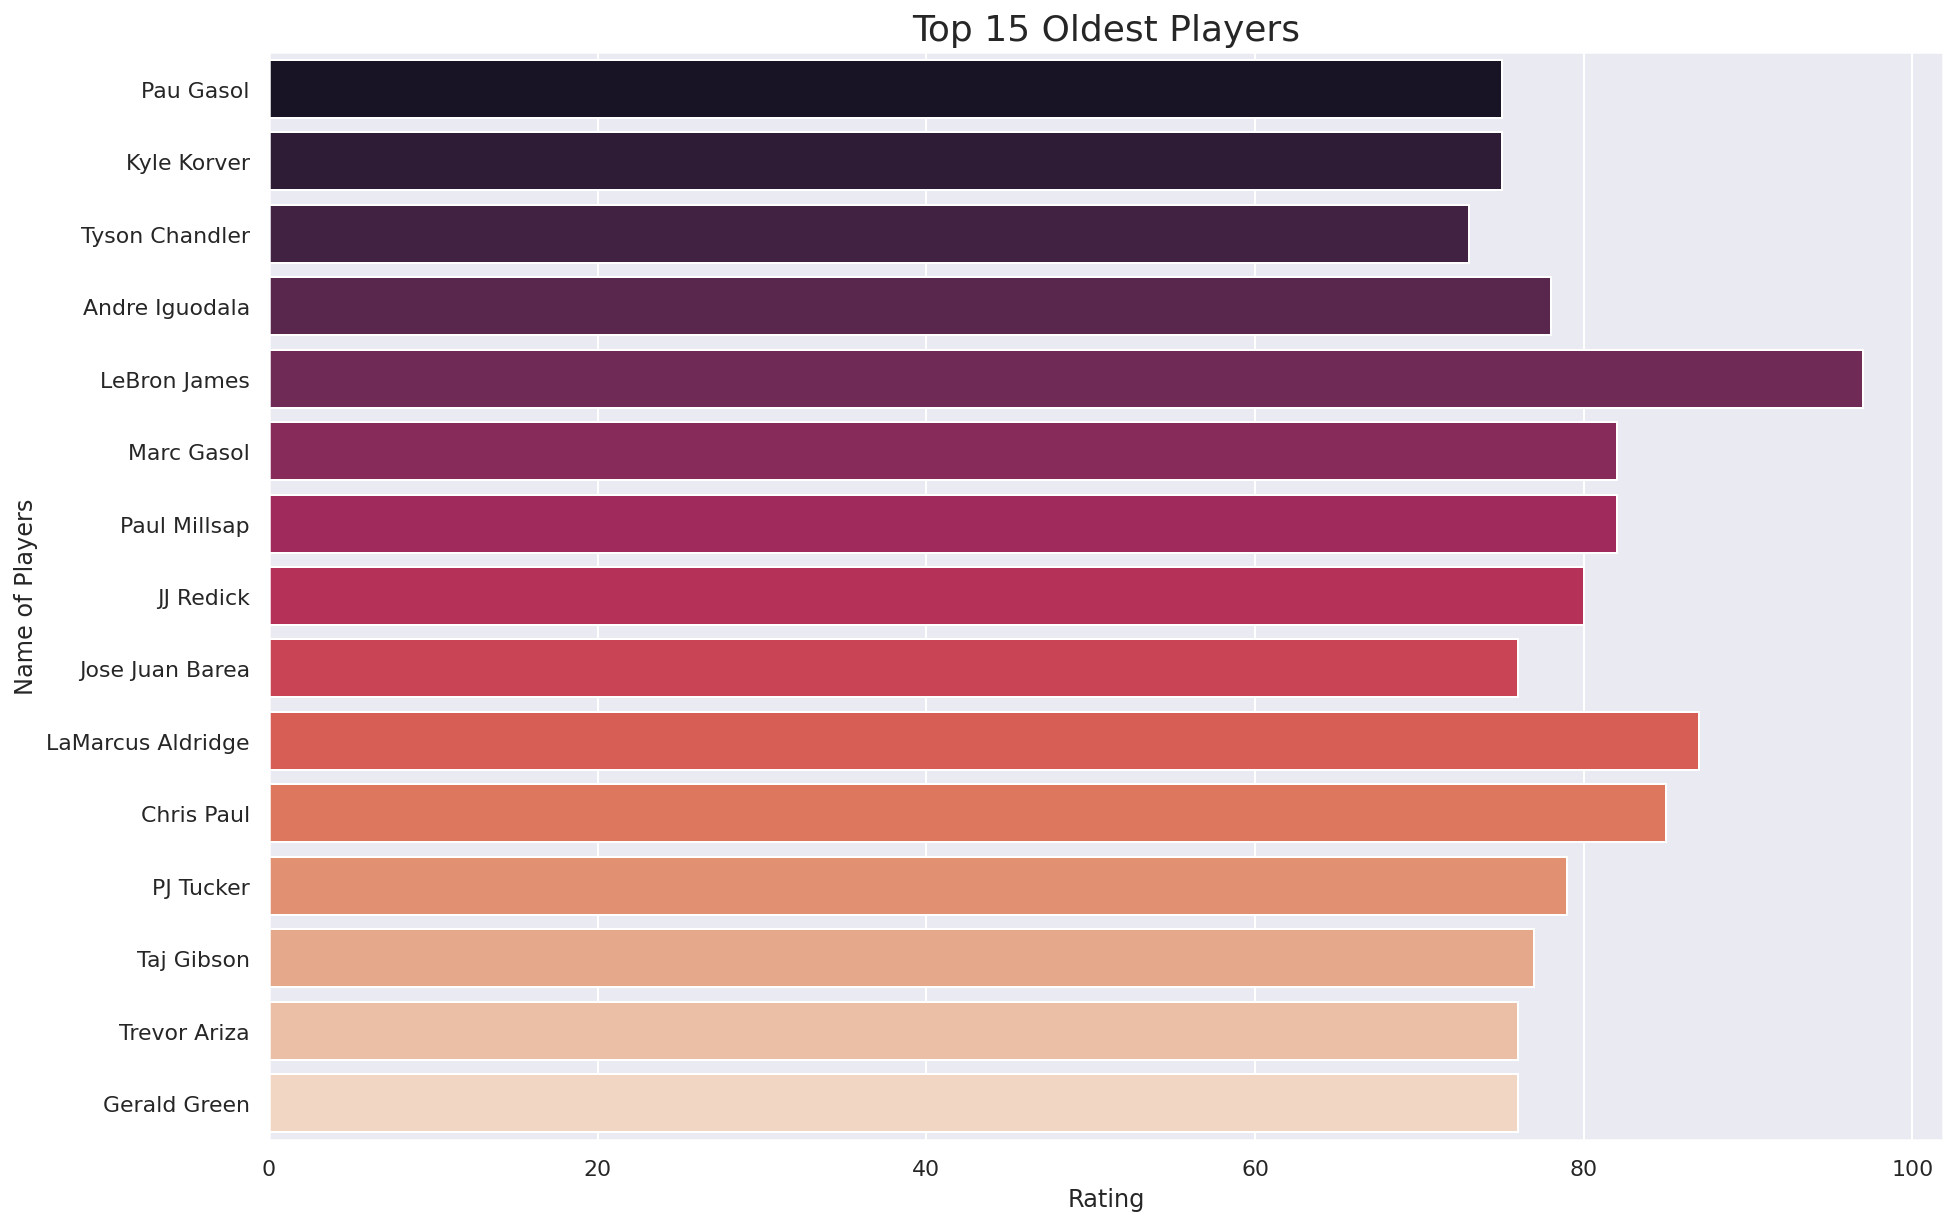

In [78]:
# talk about the graph a bit
oldest_players = df_nba.sort_values(['current_age', 'rating'], ascending=False).head(15)
print(oldest_players[['full_name','rating','current_age']])

plt.figure(figsize=(15, 10))
sns.barplot(x = oldest_players.rating, y=oldest_players['full_name'], data = oldest_players, palette='rocket')
plt.xlabel('Rating')
plt.ylabel('Name of Players')
plt.title('Top 15 Oldest Players',fontsize=18)
plt.show()

             full_name  rating  current_age      salary
203          Pau Gasol      75           40   5538540.0
222        Kyle Korver      75           39   6004753.0
282     Tyson Chandler      73           38   2564753.0
123     Andre Iguodala      78           37  17185185.0
0         LeBron James      97           36  37436858.0
68        Paul Millsap      82           36  30350000.0
63          Marc Gasol      82           36  25595700.0
87           JJ Redick      80           36  13486300.0
167    Jose Juan Barea      76           36   2564753.0
48          Chris Paul      85           35  38506482.0
21   LaMarcus Aldridge      87           35  26000000.0
329       Courtney Lee      72           35  12759670.0
165       Trevor Ariza      76           35  12200000.0
146         Taj Gibson      77           35   9000000.0
108          PJ Tucker      79           35   8349039.0


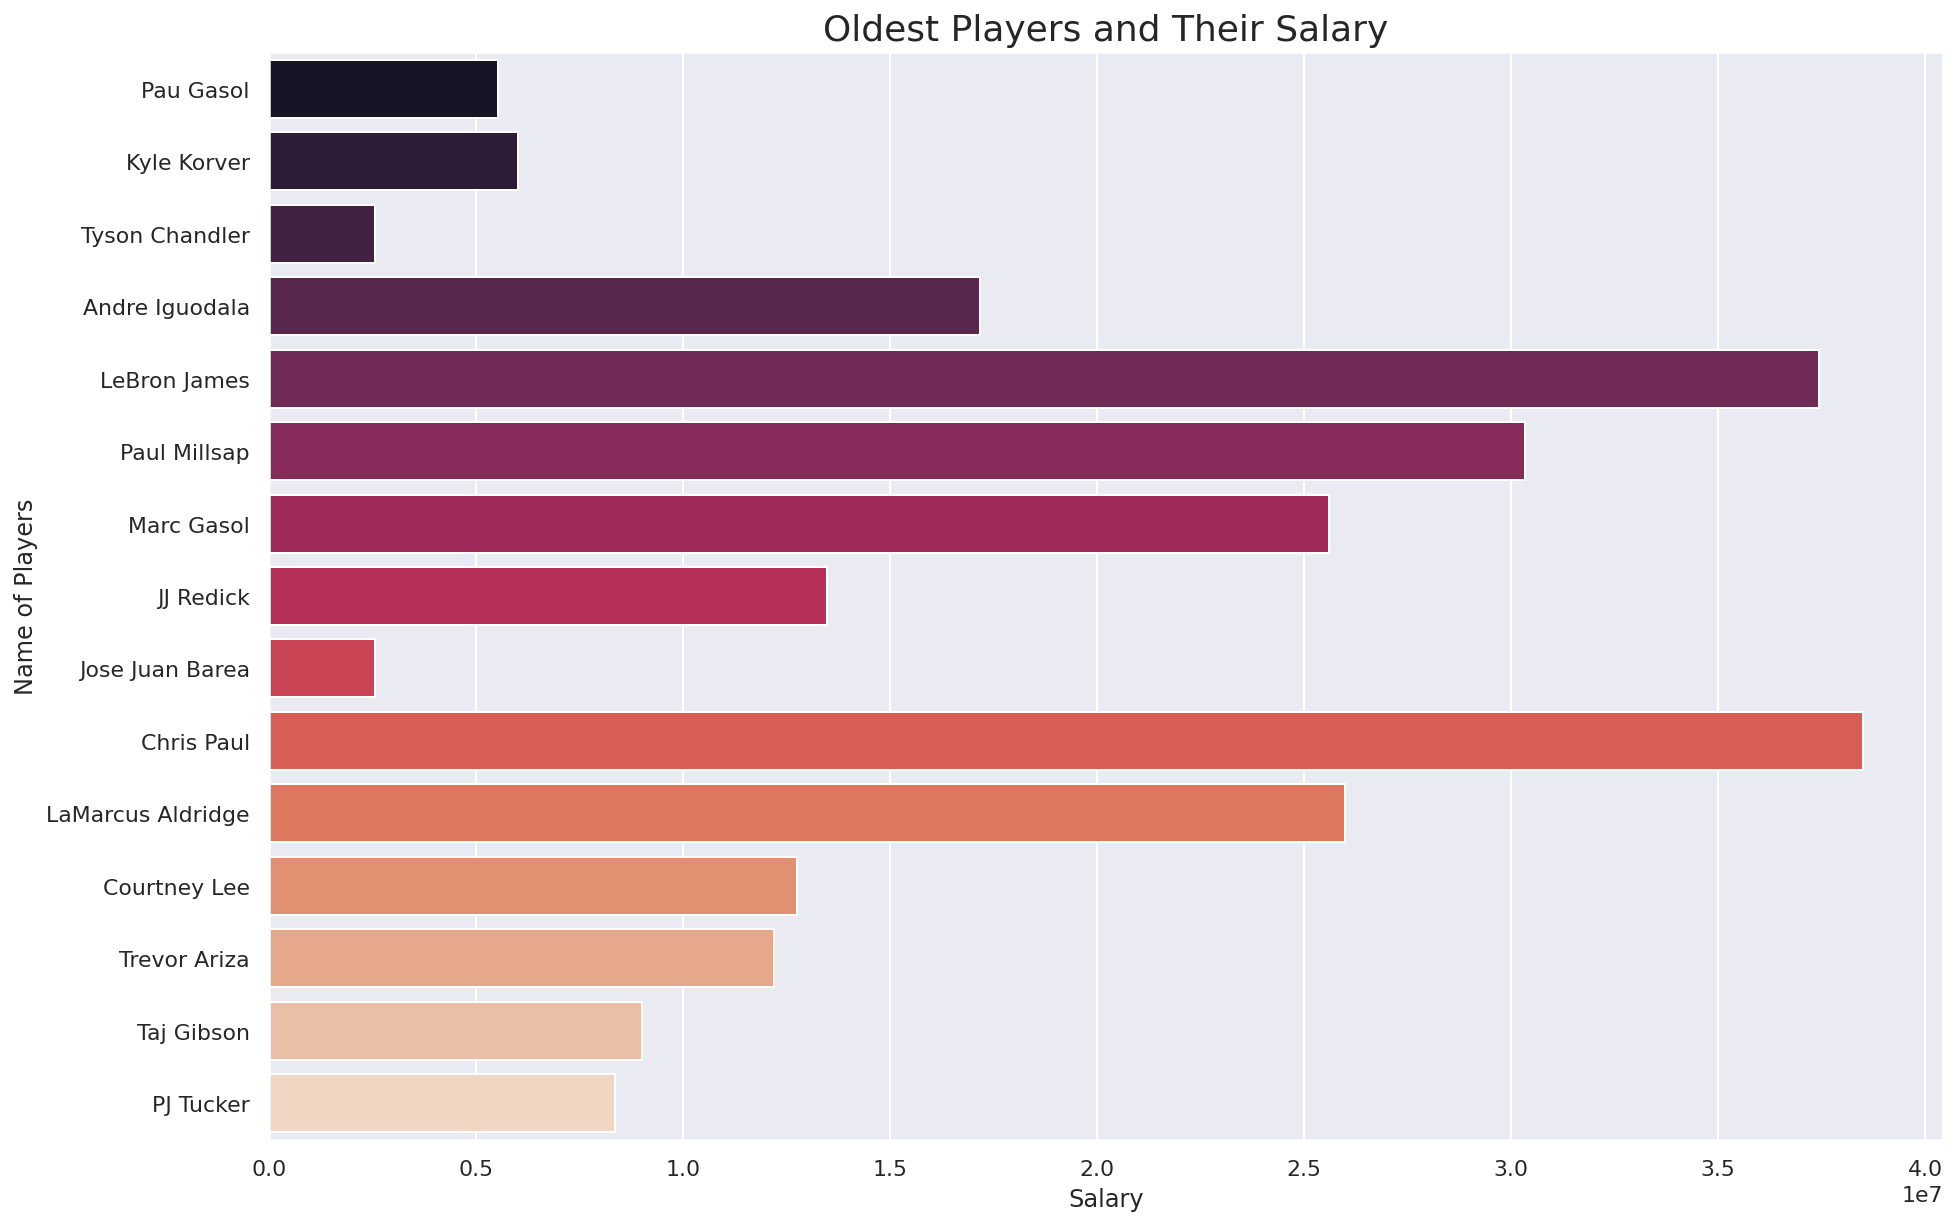

In [79]:
#talk aboout the graph a bit
salary_oldest = df_nba.sort_values(['current_age', 'salary'], ascending=False).head(15)
print(salary_oldest[['full_name','rating','current_age','salary']])

plt.figure(figsize=(15, 10))
sns.barplot(x = salary_oldest.salary, y=salary_oldest['full_name'], data = salary_oldest, palette='rocket')
plt.xlabel('Salary')
plt.ylabel('Name of Players')
plt.title('Oldest Players and Their Salary', fontsize=18)
plt.show()

Teams usually pay older players lesser because sa their age goes up they become less athletic, has less potential to improve their game and are more prone to injury. With the exception of Lebron James, Paul Millsap and Chris Paul having more that $3m of salary because they have very high ratings.

               full_name  rating  current_age
427         Jalen Lecque      68           20
387        Darius Bazley      70           20
403  Talen Horton-Tucker      70           20
380       Alen Smailagic      71           20
347         Kevin Porter      72           20
312      Sekou Doumbouya      73           20
271         Jaxson Hayes      74           20
202           Coby White      76           20
137       Darius Garland      77           20
112           RJ Barrett      78           20
72       Zion Williamson      81           20
421          Isaac Bonga      68           21
400    Jarred Vanderbilt      70           21
402         Jordan Poole      70           21
406             Naz Reid      70           21


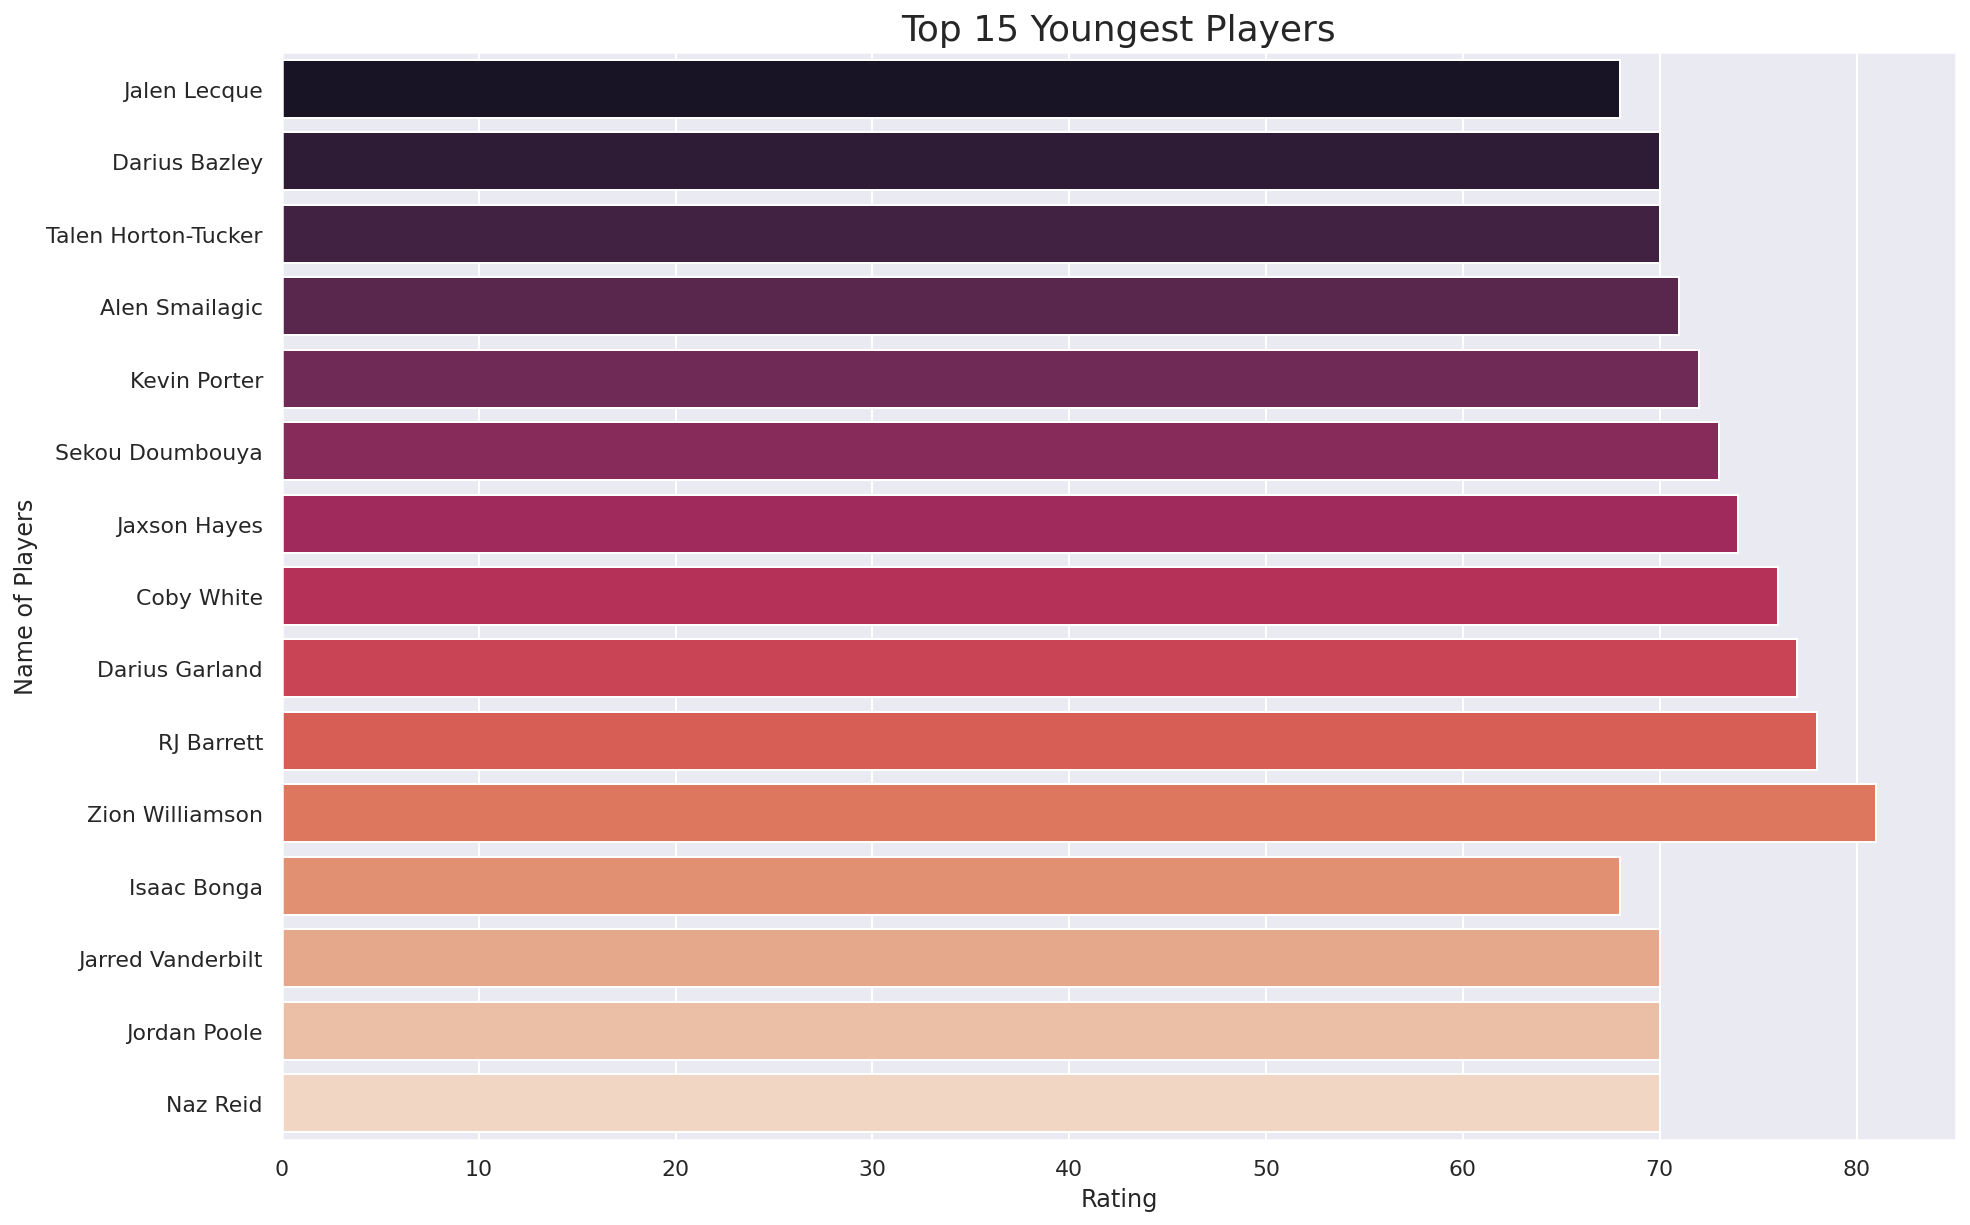

In [80]:
# talk about the graph a bit
youngest_players = df_nba.sort_values(['current_age', 'rating'], ascending=True).head(15)
print(youngest_players[['full_name','rating','current_age']])

plt.figure(figsize=(15, 10))
sns.barplot(x = youngest_players.rating, y=youngest_players['full_name'], data = youngest_players, palette='rocket')
plt.xlabel('Rating')
plt.ylabel('Name of Players')
plt.title('Top 15 Youngest Players', fontsize=18)
plt.show()

               full_name  rating  current_age     salary
380       Alen Smailagic      71           20   898310.0
403  Talen Horton-Tucker      70           20   898310.0
427         Jalen Lecque      68           20   898310.0
347         Kevin Porter      72           20  1290960.0
387        Darius Bazley      70           20  2284800.0
312      Sekou Doumbouya      73           20  3285120.0
271         Jaxson Hayes      74           20  4862040.0
202           Coby White      76           20  5307120.0
137       Darius Garland      77           20  6400920.0
112           RJ Barrett      78           20  7839960.0
72       Zion Williamson      81           20  9757440.0
383            KZ Okpala      71           21   898310.0
406             Naz Reid      70           21   898310.0
400    Jarred Vanderbilt      70           21  1416852.0
421          Isaac Bonga      68           21  1416852.0


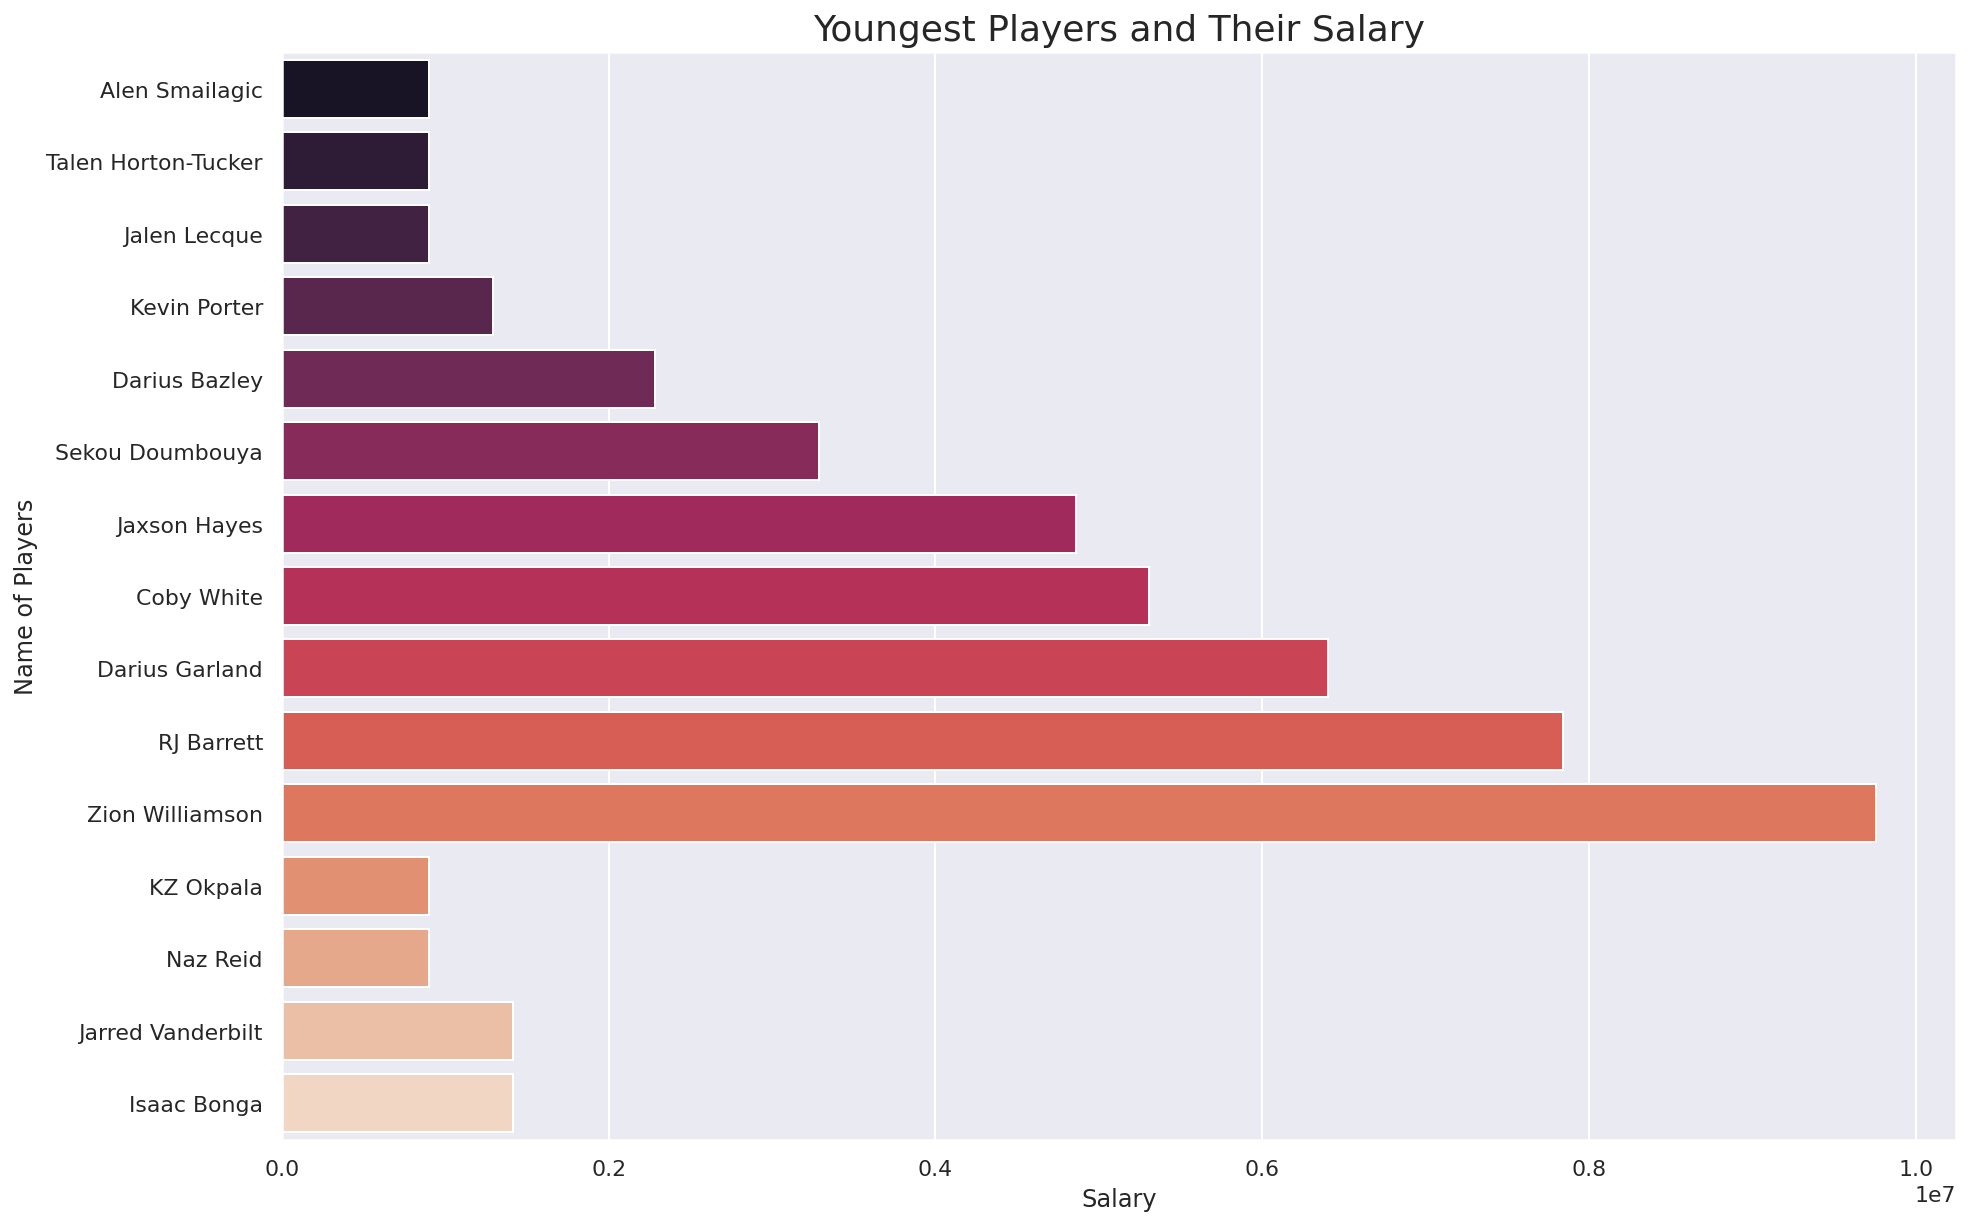

In [81]:
#talk about the graph a bit
salary_youngest = df_nba.sort_values(['current_age', 'salary'], ascending=True).head(15)
print(salary_youngest[['full_name','rating','current_age','salary']])

plt.figure(figsize=(15, 10))
sns.barplot(x = salary_youngest.salary, y=salary_youngest['full_name'], data = salary_youngest, palette='rocket')
plt.xlabel('Salary')
plt.ylabel('Name of Players')
plt.title('Youngest Players and Their Salary', fontsize=18)
plt.show()

Similarly to the older players, the younger players have a similar pattern. Teams will also pay them lesser because they are inexperienced. With the exception of Zion Williamson having a salary of almost $1m but being the only one rated more than 80 among the youngest players. 

               full_name  weight_in_kg  height_in_m position
227     Boban Marjanovic         131.5         2.24        C
27    Kristaps Porzingis          99.8         2.21      F-C
368          Luke Kornet         108.9         2.18        C
16           Rudy Gobert         108.0         2.16        C
155         Jakob Poeltl         108.4         2.16      F-C
203            Pau Gasol         113.4         2.16        C
9            Joel Embiid         113.4         2.13        C
11          Nikola Jokic         114.8         2.13        C
60       Lauri Markkanen         108.9         2.13      F-C
61          Jusuf Nurkic         131.5         2.13        C
71           Serge Ibaka         108.9         2.13        F
79      Hassan Whiteside         106.6         2.13        C
97   Willie Cauley-Stein         109.8         2.13        C
103          Brook Lopez         120.2         2.13        C
104         JaVale McGee         122.5         2.13        C


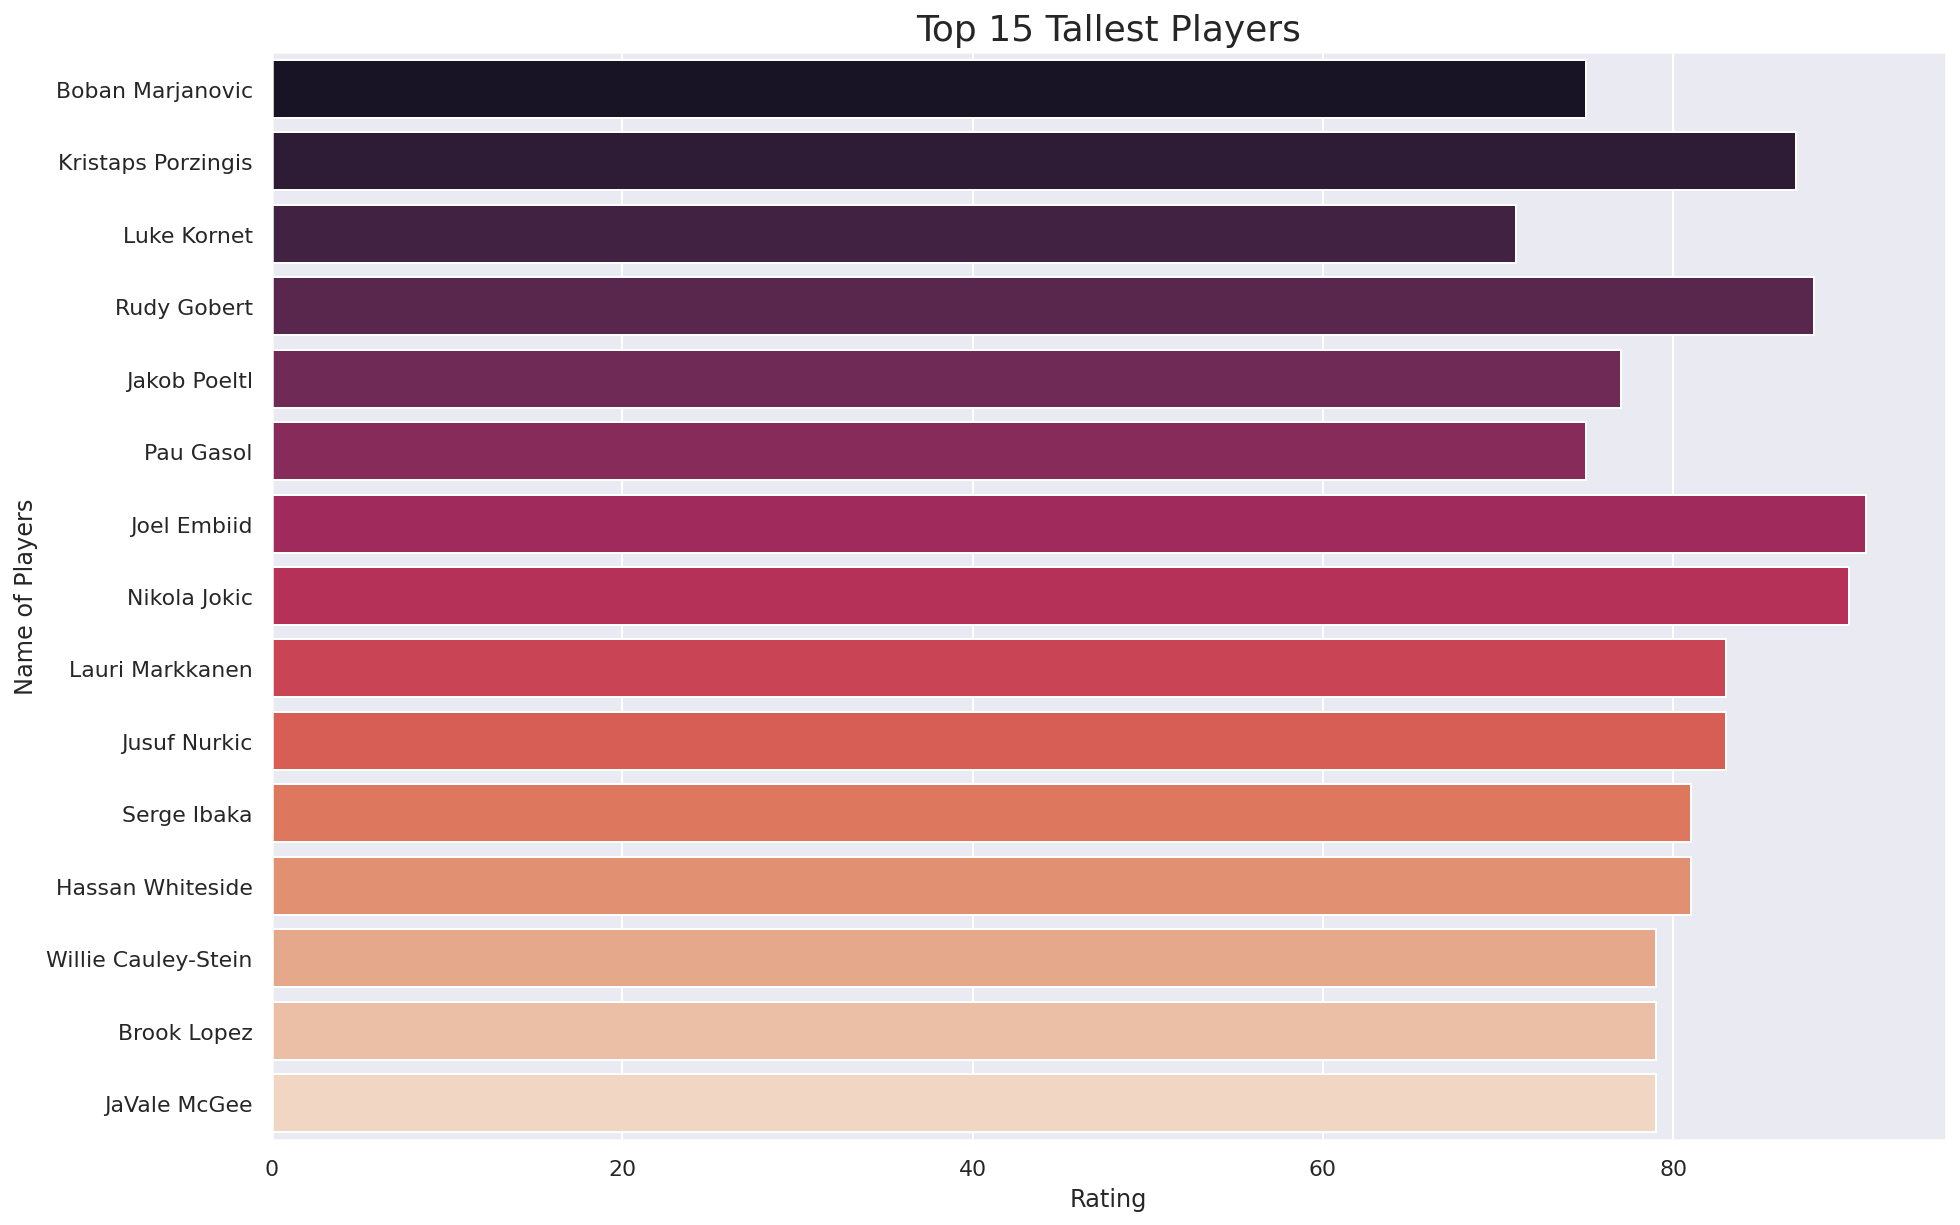

In [82]:
tallest_players = df_nba.sort_values(['height_in_m', 'rating'], ascending=False).head(15)
print(tallest_players[['full_name','weight_in_kg','height_in_m', 'position']])

plt.figure(figsize=(15, 10))
sns.barplot(x = tallest_players.rating, y=tallest_players['full_name'], data = tallest_players, palette='rocket')
plt.xlabel('Rating')
plt.ylabel('Name of Players')
plt.title('Top 15 Tallest Players',fontsize=18)
plt.show()

As mentioned in the text above, the center position is played by taller players, the graph shows that the top 15 tallest players are Forward or Center position. 

           full_name  rating  height_in_m position
198    Isaiah Thomas      76         1.75        G
167  Jose Juan Barea      76         1.78        G
369      Frank Mason      71         1.80        G
382   Carsen Edwards      71         1.80        G
166      DJ Augustin      76         1.80        G
424  Brandon Goodwin      68         1.83        G
323      Tim Frazier      72         1.83        G
288    Aaron Holiday      73         1.83        G
291       Tyus Jones      73         1.83        G
302    Ishmael Smith      73         1.83        G
250     Yogi Ferrell      74         1.83        G
232   Shabazz Napier      75         1.83        G
46        Kyle Lowry      85         1.83        G
19      Kemba Walker      88         1.83        G
411   Devonte Graham      69         1.85        G


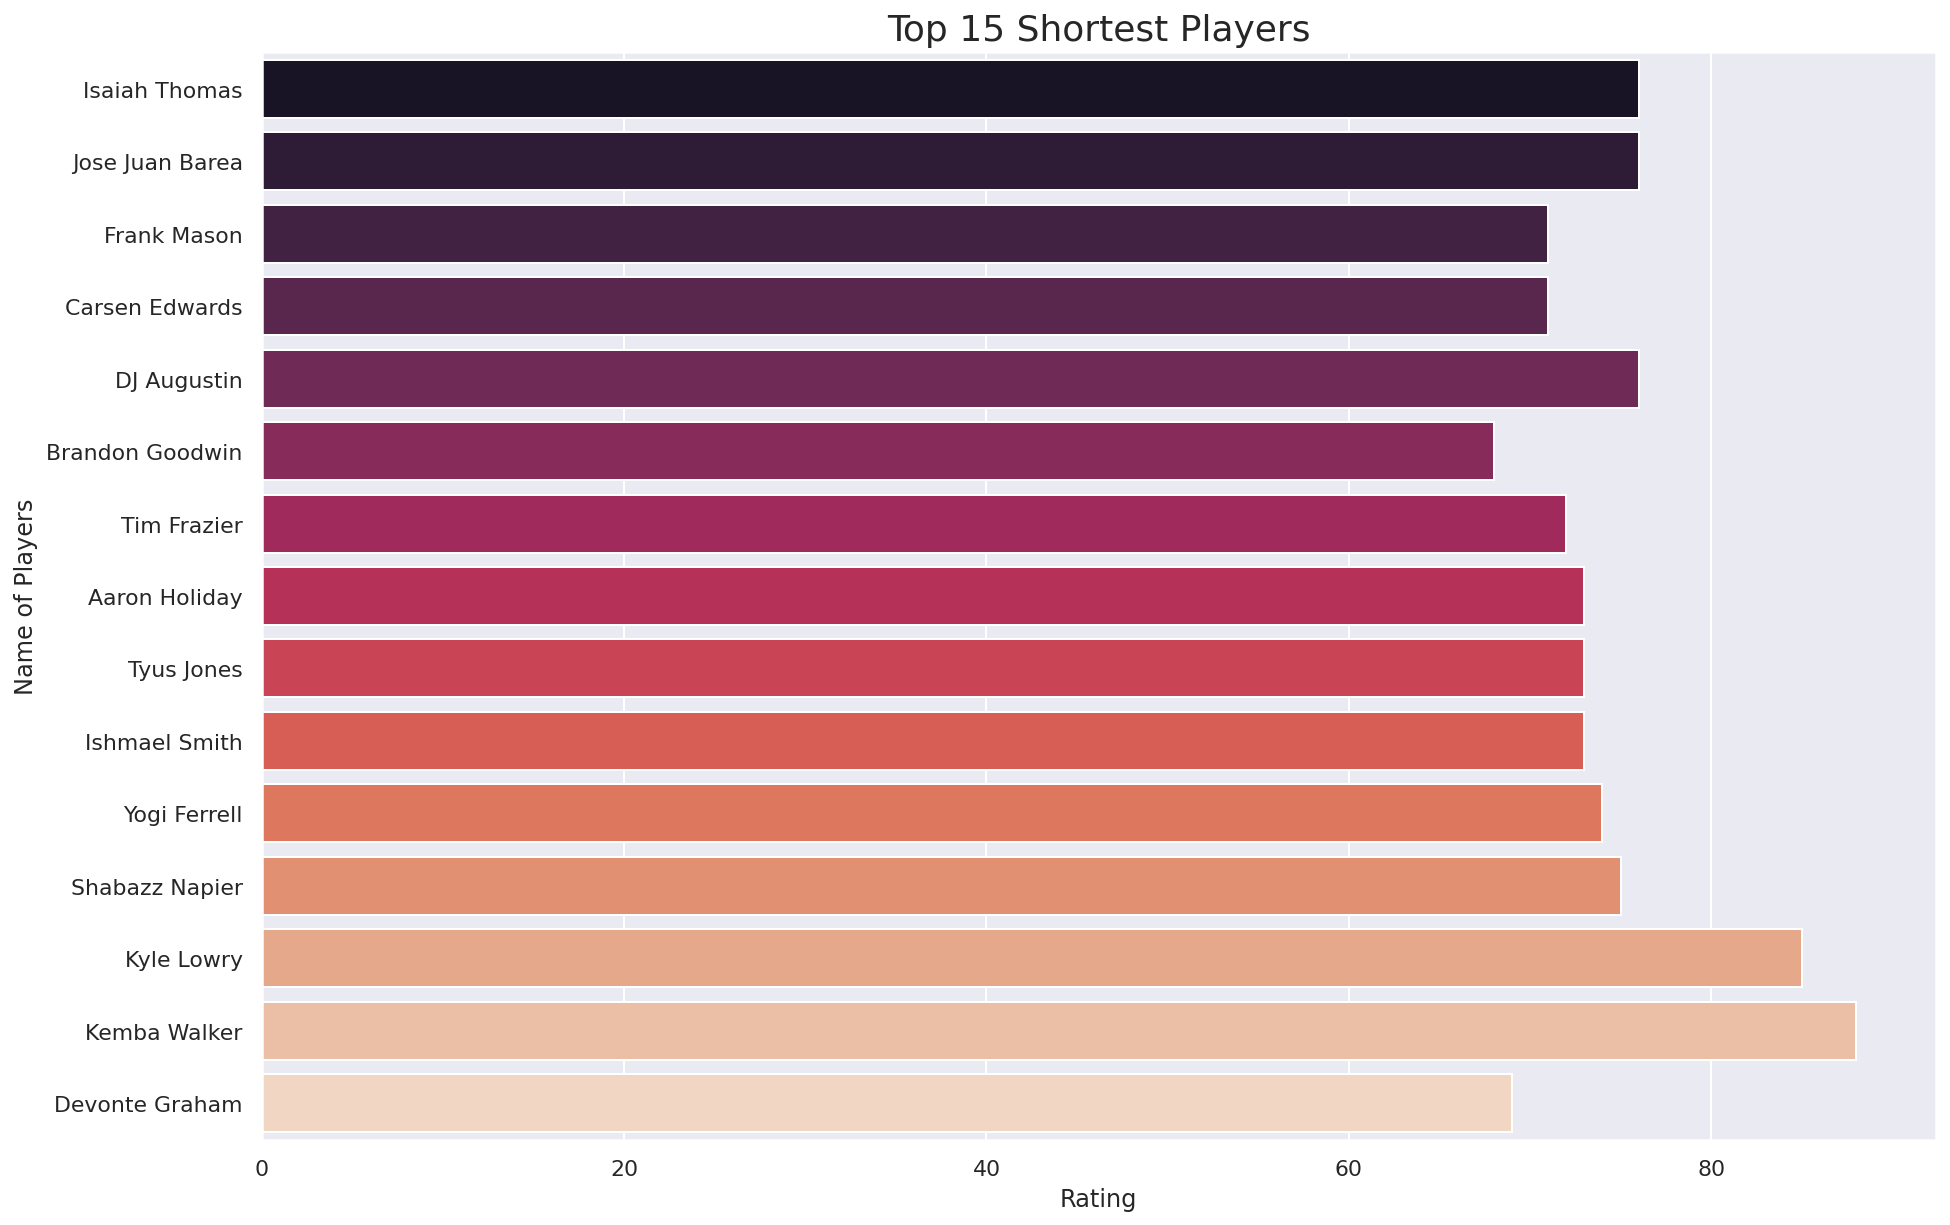

In [83]:
shortest_players = df_nba.sort_values(['height_in_m', 'rating'], ascending=True).head(15)
print(shortest_players[['full_name','rating','height_in_m', 'position']])
plt.figure(figsize=(15, 10))
sns.barplot(x = shortest_players.rating, y=shortest_players['full_name'], data = shortest_players, palette='rocket')
plt.xlabel('Rating')
plt.ylabel('Name of Players')
plt.title('Top 15 Shortest Players',fontsize=18)
plt.show()

The similar pattern is seen in the graph for "top 15 shortest players". All the players play the guard position which is nothing out of the ordinary.


             full_name  height_in_m  weight_in_kg position
61        Jusuf Nurkic         2.13         131.5        C
227   Boban Marjanovic         2.24         131.5        C
72     Zion Williamson         1.98         128.8        F
33    DeMarcus Cousins         2.08         122.5        C
34      Andre Drummond         2.08         122.5        C
104       JaVale McGee         2.13         122.5        C
190      Jahlil Okafor         2.08         122.5        C
322  Cristiano Felicio         2.08         122.5        F
63          Marc Gasol         2.11         120.2        C
76      DeAndre Jordan         2.11         120.2        C
103        Brook Lopez         2.13         120.2        C
162        Ivica Zubac         2.13         120.2        C
85         Enes Kanter         2.08         118.8        C
59          Kevin Love         2.03         117.9        F
204        Aron Baynes         2.08         117.9        C


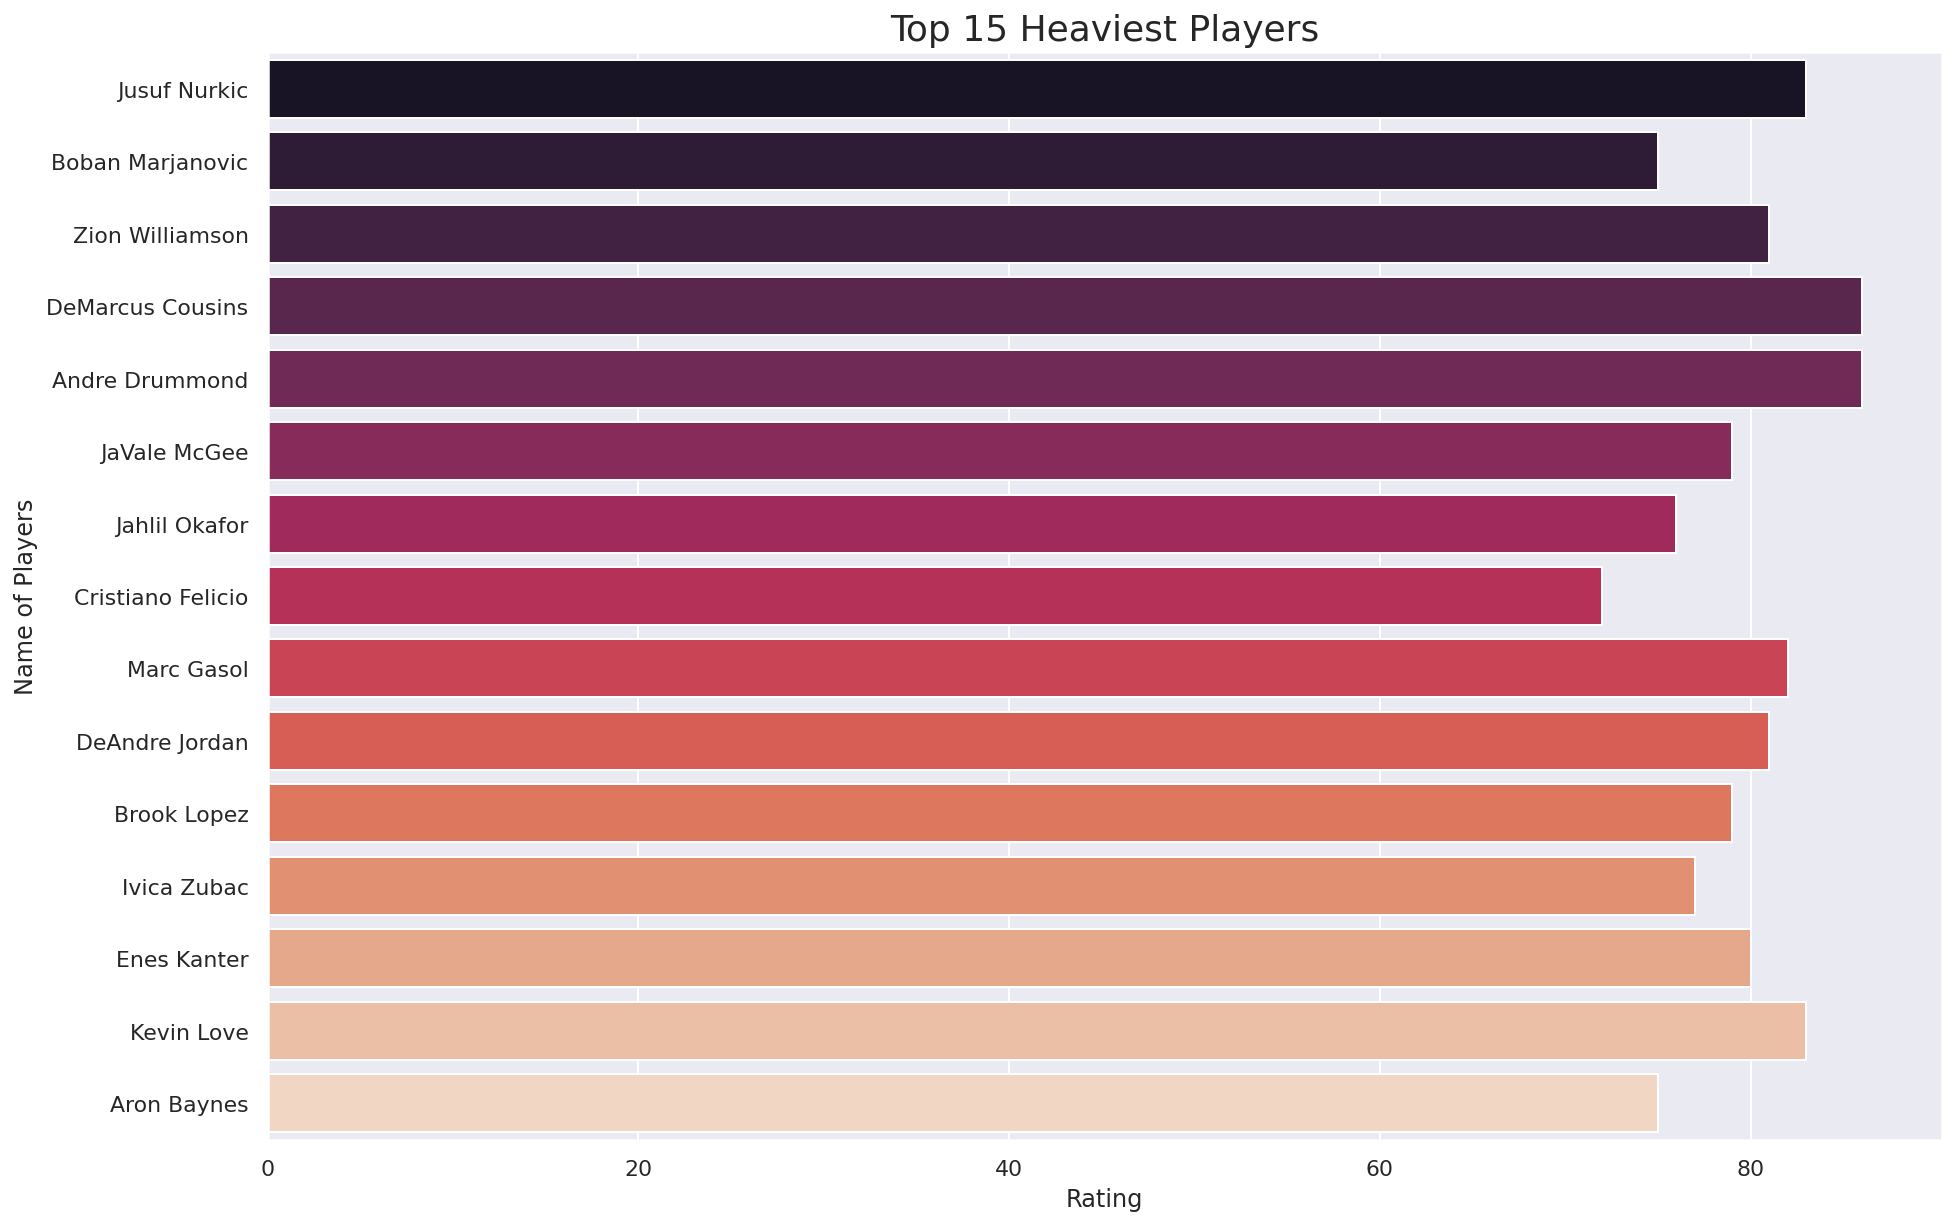

In [84]:
heaviest_players = df_nba.sort_values(['weight_in_kg', 'rating'], ascending=False).head(15)
print(heaviest_players[['full_name','height_in_m','weight_in_kg', 'position']])

plt.figure(figsize=(15, 10))
sns.barplot(x = heaviest_players.rating, y=heaviest_players['full_name'], data = heaviest_players, palette='rocket')
plt.xlabel('Rating')
plt.ylabel('Name of Players')
plt.title('Top 15 Heaviest Players',fontsize=18)
plt.show()

The barplot for heaviest players shows that the patterns are similar to the tallest players barplot. The height of a player is strongly correlated to the weight of the player. Therefore the taller players are usually heavier and they play either the Forward or Center position which requires the player to be tall.

            full_name  height_in_m  weight_in_kg position
323       Tim Frazier         1.83          77.1        G
334         Raul Neto         1.85          77.1        G
126   Dejounte Murray         1.93          77.1        G
31       De'Aaron Fox         1.91          77.6        G
133  Dennis Schroeder         1.85          78.0        G
19       Kemba Walker         1.83          78.0        G
90          Ja Morant         1.91          78.9        G
302     Ishmael Smith         1.83          79.4        G
232    Shabazz Napier         1.83          79.4        G
167   Jose Juan Barea         1.78          79.4        G
137    Darius Garland         1.85          79.4        G
152      Monte Morris         1.88          79.4        G
114       Will Barton         1.96          79.4        G
53     Louis Williams         1.85          79.4        G
48         Chris Paul         1.85          79.4        G


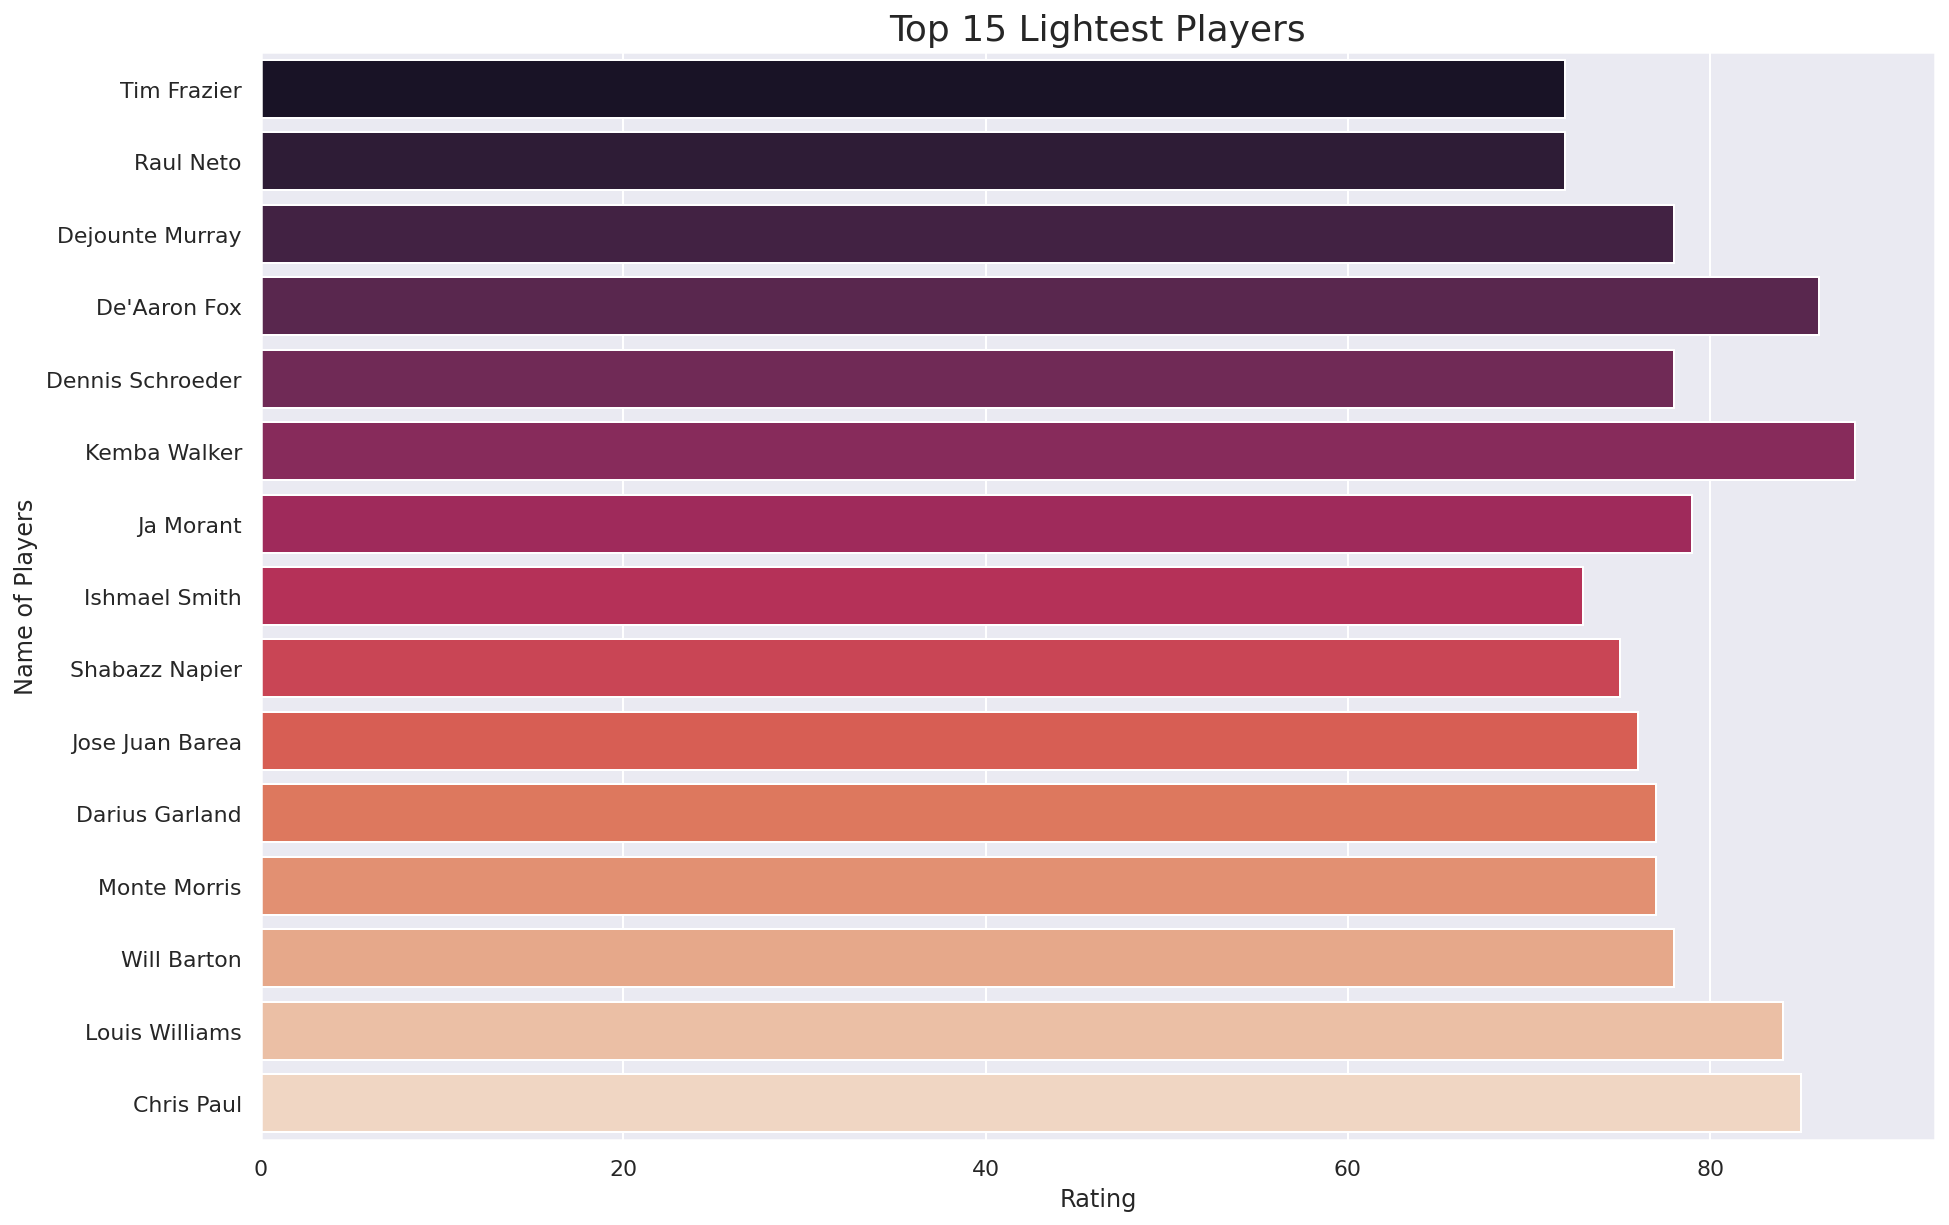

In [85]:
lightest_players = df_nba.sort_values(['weight_in_kg', 'rating'], ascending=True).head(15)
print(lightest_players[['full_name','height_in_m','weight_in_kg', 'position']])

plt.figure(figsize=(15, 10))
sns.barplot(x = lightest_players.rating, y=lightest_players['full_name'], data = lightest_players, palette='rocket')
plt.xlabel('Rating')
plt.ylabel('Name of Players')
plt.title('Top 15 Lightest Players',fontsize=18)
plt.show()

The same can be said to this barplot as well. The light players are usually shorter and the play the guard position. The sports require them to be agile and quick on their feet to move or dribble the ball around faster and avoid opponents and score the basket more efficiently.


In [86]:
sorted_df_rating = df_nba.sort_values(['rating'], ascending=False)
positions = ['G', 'G-F', 'F', 'F-C', 'C']
best_players_for_each_position = list()

for pos in positions:
    part = sorted_df_rating[sorted_df_rating['position']==pos]
    best_players_for_each_position.append(part.head(1))
    
best_players_for_each_position = pd.concat(best_players_for_each_position)
print(best_players_for_each_position)

               full_name  rating  ...  current_age year_played
4           James Harden      96  ...           31          11
2  Giannis Antetokounmpo      96  ...           26           7
0           LeBron James      97  ...           36          17
6          Anthony Davis      94  ...           27           8
9            Joel Embiid      91  ...           26           6

[5 rows x 17 columns]


The above is the best players in the NBA league for the 2019/2020 season for each positions. 